#**Phase 1 : Data Preparation and Exploratory Data Analysis**

In [ ]:
# @title
import pandas as pd
import numpy as np
import json
import os


# Set the path to your CSV file
# Make sure this path is correct for your file on Google Drive
file_path = 'D:\SIC\dataset.csv'

print(f" Loading dataset from {file_path} ")
# Use on_bad_lines='skip' to handle the corrupted row we found earlier
try:
    df = pd.read_csv(file_path, on_bad_lines='skip')
    print(f"Successfully loaded {len(df)} rows.")
except Exception as e:
    print(f"ERROR: Could not load CSV file. Please check the path. Error details: {e}")
    # Stop the script if the file can't be loaded
    exit()

# Data Cleaning: Fill NaN values in feature columns
# This is the first step in the transformation process. We ensure all our feature columns are purely numerical.
print("\n--- [Step 1: Cleaning] Handling missing values in feature columns... ---")

# Define all the format-specific feature columns that might have NaN/blanks
# and should be filled with 0.
feature_cols_to_clean = [
    'avg_line_length', 'page_count', 'image_width', 'image_height',
    'color_channels', 'bit_depth_image', 'duration_seconds',
    'sample_rate', 'channels_audio', 'bit_depth_audio'
]

# The .fillna() method replaces any NaN values in these columns with 0.
# We use inplace=True to modify the DataFrame directly.
df[feature_cols_to_clean] = df[feature_cols_to_clean].fillna(0)

print("Filled NaN values in all format-specific feature columns with 0.")
print("The data is now clean and ready for transformation.")


# Data Transformation: Expand the 'byte_distribution' column
# This is the main transformation step. We convert the single text column
# into 256 numerical features that our Deep Learning models can understand.
print("\n--- [Step 2: Transformation] Expanding 'byte_distribution' feature... ---")

try:
    # Use the 'apply' method with json.loads to safely parse the dictionary string in each row.
    # pd.Series then expands each dictionary into a new set of columns (0, 1, 2, ...).
    byte_dist_df = df['byte_distribution'].apply(lambda x: pd.Series(json.loads(x)))

    # Rename the new columns to be descriptive (e.g., 'byte_0', 'byte_1', etc.)
    byte_dist_df = byte_dist_df.rename(columns={i: f'byte_{i}' for i in range(256)})

    # Join the new 256 columns back to the original dataframe
    df = df.join(byte_dist_df)

    # Drop the original, now redundant, 'byte_distribution' string column
    df = df.drop('byte_distribution', axis=1)

    print(f"Successfully expanded byte_distribution. DataFrame now has {len(df.columns)} columns.")

except Exception as e:
    print(f"   - ERROR during byte_distribution expansion. Please check the format of the column. Error: {e}")


print("\n--- Transformation Complete ---")
print("Verifying the final DataFrame structure:")

# .info() is for checking that there are no unexpected nulls and that datatypes are correct.
df.info(verbose=False, max_cols=10) # Using verbose=False for a cleaner summary

# Check if any NaNs remain in the final feature set
feature_columns = df.columns.drop(['file_name', 'file_extension', 'best_tool'] + [col for col in df if 'ratio' in col])

 Loading dataset from ./dataset.csv 
Successfully loaded 122977 rows.

--- [Step 1: Cleaning] Handling missing values in feature columns... ---
Filled NaN values in all format-specific feature columns with 0.
The data is now clean and ready for transformation.

--- [Step 2: Transformation] Expanding 'byte_distribution' feature... ---
Successfully expanded byte_distribution. DataFrame now has 277 columns.

--- Transformation Complete ---
Verifying the final DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122977 entries, 0 to 122976
Columns: 277 entries, file_name to 255
dtypes: float64(265), int64(9), object(3)
memory usage: 259.9+ MB


In [ ]:
# @title
pip install pandas


  Using cached pandas-2.3.2-cp310-cp310-win_amd64.whl (11.3 MB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Projects\SICProject\tf-env\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
# @title
remaining_nans = df[feature_columns].isnull().sum().sum()
print(f"\nTotal remaining NaN values in all input feature columns: {remaining_nans}")

if remaining_nans == 0:
    print("PASS: The feature set is clean and fully numerical.")
else:
    print("FAIL: There are still missing values in the feature set that need handling.")

print("\nPreview of the final, transformed DataFrame:")
df.head()


Total remaining NaN values in all input feature columns: 0
PASS: The feature set is clean and fully numerical.

Preview of the final, transformed DataFrame:


,file_name,file_extension,file_size,entropy,avg_line_length,page_count,image_width,image_height,color_channels,bit_depth_image,...,246,247,248,249,250,251,252,253,254,255
0,0.wav,wav,160044,7.274756,0.0,0,0,0,0,0,...,0.013615,0.015746,0.017095,0.017964,0.018764,0.020094,0.021625,0.021538,0.022762,0.022856
1,03-01-01-01-01-01-01.wav,wav,375720,3.798532,0.0,0,0,0,0,0,...,0.001067,0.001078,0.001094,0.001216,0.001453,0.001621,0.002111,0.004466,0.015501,0.105994
2,03-01-01-01-01-01-02.wav,wav,410114,4.107836,0.0,0,0,0,0,0,...,0.001061,0.001258,0.001336,0.001458,0.001729,0.002331,0.004316,0.008544,0.018617,0.106285
3,03-01-01-01-01-01-04.wav,wav,374522,3.871851,0.0,0,0,0,0,0,...,0.001020,0.001063,0.001202,0.001194,0.001453,0.001837,0.002756,0.006307,0.015225,0.099036
4,03-01-01-01-01-01-06.wav,wav,367496,3.760627,0.0,0,0,0,0,0,...,0.001363,0.001257,0.001401,0.001488,0.001589,0.001608,0.001989,0.003614,0.013086,0.124067


In [ ]:
# @title
# Clean the ratio columns
# Define all columns that contain compression ratios
ratio_cols = ['ratio_7zip', 'ratio_winrar', 'ratio_zip', 'ratio_gzip', 'ratio_bzip2', 'ratio_flac']

# Fill any NaN values in these specific columns with 0.
# This makes the dataset fully numeric and prevents errors in any later analysis.
df[ratio_cols] = df[ratio_cols].fillna(0)

print("Cleaned ratio columns: Replaced NaN values with 0.")

Cleaned ratio columns: Replaced NaN values with 0.


In [ ]:
# @title
column_names = df.columns.tolist()
print(column_names)

['file_name', 'file_extension', 'file_size', 'entropy', 'avg_line_length', 'page_count', 'image_width', 'image_height', 'color_channels', 'bit_depth_image', 'duration_seconds', 'sample_rate', 'channels_audio', 'bit_depth_audio', 'ratio_7zip', 'ratio_winrar', 'ratio_zip', 'ratio_gzip', 'ratio_bzip2', 'ratio_flac', 'best_tool', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111'

In [ ]:
# @title
print("\n 1. Overall Dataset Dimensions ")
print(f"Number of Rows (Files): {df.shape[0]}")
print(f"Number of Columns (Features + Metadata): {df.shape[1]}")


 1. Overall Dataset Dimensions 
Number of Rows (Files): 122977
Number of Columns (Features + Metadata): 277


In [ ]:
# @title
# Summary Statistics for UNIVERSAL Features
print("\n Summary Statistics for Universal Features (Applied to all 122,976 files)")
universal_features = ['file_size', 'entropy']
universal_stats_table = df[universal_features].describe()
print(universal_stats_table)


 Summary Statistics for Universal Features (Applied to all 122,976 files)
          file_size        entropy
count  1.229770e+05  122977.000000
mean   4.388496e+05       6.340400
std    2.690594e+06       1.558263
min    2.000000e+00       0.918296
25%    1.248100e+04       4.766300
50%    9.064600e+04       6.825311
75%    3.304110e+05       7.936999
max    1.687128e+08       7.999988


In [ ]:
# @title
print("\n 2. Context-Specific Statistics for Format-Specific Features")
print("NOTE: These statistics are calculated ONLY on the relevant file types.")

# a) For IMAGE files
print("\n a. Image Files Statistics ")
image_extensions = ['jpg','png']
image_features = ['image_width', 'image_height', 'color_channels', 'bit_depth_image']
df_images = df[df['file_extension'].isin(image_extensions)]
image_stats_table = df_images[image_features].describe()
print(f"Calculated on {len(df_images)} image files:")
print(image_stats_table)


 2. Context-Specific Statistics for Format-Specific Features
NOTE: These statistics are calculated ONLY on the relevant file types.

 a. Image Files Statistics 
Calculated on 41863 image files:
        image_width  image_height  color_channels  bit_depth_image
count  41863.000000  41863.000000    41863.000000     41863.000000
mean     582.413086    535.196379        2.911975         7.999618
std      411.328609    405.548229        0.787768         0.055295
min        0.000000      0.000000        0.000000         0.000000
25%      262.000000    226.000000        3.000000         8.000000
50%      400.000000    350.000000        3.000000         8.000000
75%      887.000000    759.000000        3.000000         8.000000
max     7913.000000   7913.000000        4.000000         8.000000


In [ ]:
# @title
df = df[df['file_extension'] != 'xlsx']

file_type_counts = df['file_extension'].value_counts()
print("This table shows the composition of our manually collected dataset.")
print(file_type_counts)

This table shows the composition of our manually collected dataset.
file_extension
jpg     30607
json    18475
wav     17687
csv     16761
txt     16435
pdf     11755
png     11256
Name: count, dtype: int64


In [ ]:
# @title
print("\n b. Audio Files Statistics")
audio_extensions = ['wav']
audio_features = ['duration_seconds', 'sample_rate', 'channels_audio', 'bit_depth_audio']
df_audio = df[df['file_extension'].isin(audio_extensions)]
audio_stats_table = df_audio[audio_features].describe()
print(f"Calculated on {len(df_audio)} audio files:")
print(audio_stats_table)


 b. Audio Files Statistics
Calculated on 17687 audio files:
       duration_seconds   sample_rate  channels_audio  bit_depth_audio
count      17687.000000  17687.000000    17687.000000          17687.0
mean           6.348290  24637.631368        1.000283             16.0
std           10.331604   7133.298191        0.016812              0.0
min            0.976000  16000.000000        1.000000             16.0
25%            3.420000  22050.000000        1.000000             16.0
50%            5.719000  22050.000000        1.000000             16.0
75%            7.948000  24414.000000        1.000000             16.0
max          496.039000  96000.000000        2.000000             16.0


In [ ]:
# @title
# c) For TEXT-BASED files
print("\n c. Text-Based Files Statistics ")
text_extensions = ['txt', 'csv', 'json']
text_features = ['avg_line_length'] # Add others like page_count if relevant for PDFs separately
df_text = df[df['file_extension'].isin(text_extensions)]
text_stats_table = df_text[text_features].describe()
print(f"Calculated on {len(df_text)} text-based files:")
print(text_stats_table)


 c. Text-Based Files Statistics 
Calculated on 51671 text-based files:
       avg_line_length
count     5.167100e+04
mean      8.696197e+03
std       9.605483e+05
min       1.000000e+00
25%       2.336211e+01
50%       4.721157e+01
75%       1.665486e+02
max       1.687128e+08


In [ ]:
# @title
# d) For Document-BASED files
print("\n d. Doc-Based Files Statistics-")
text_extensions = ['pdf']
text_features = ['page_count'] # Add others like page_count if relevant for PDFs separately
df_text = df[df['file_extension'].isin(text_extensions)]
text_stats_table = df_text[text_features].describe()
print(f"Calculated on {len(df_text)} doc-based files:")
print(text_stats_table)


 d. Doc-Based Files Statistics-
Calculated on 11755 doc-based files:
         page_count
count  11755.000000
mean      13.116546
std       50.048634
min        0.000000
25%        1.000000
50%        2.000000
75%        8.000000
max     1178.000000



 a. Distribution of File Types (by extension)
file_extension
jpg     30607
json    18475
wav     17687
csv     16761
txt     16435
pdf     11755
png     11256
Name: count, dtype: int64


C:\Users\suhas\AppData\Local\Temp\ipykernel_3312\3219852986.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='file_extension', data=df, order=file_type_counts.index, palette='viridis')


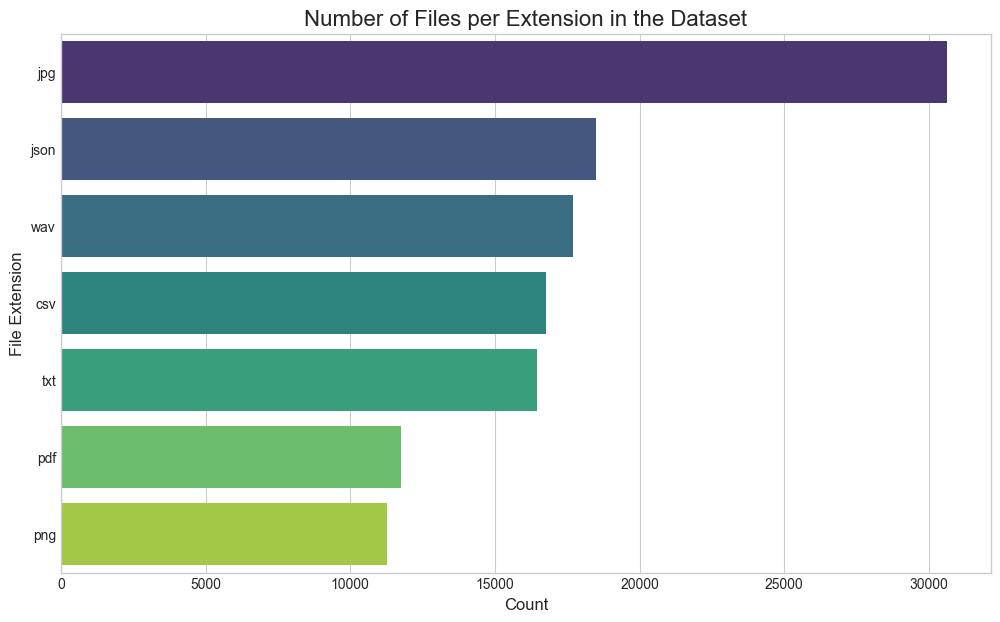

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

print("\n a. Distribution of File Types (by extension)")
file_type_counts = df['file_extension'].value_counts()
print(file_type_counts)
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
sns.countplot(y='file_extension', data=df, order=file_type_counts.index, palette='viridis')
plt.title('Number of Files per Extension in the Dataset', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('File Extension', fontsize=12)
plt.show()

In [ ]:
# @title
pip install tensorflow matplotlib seaborn numpy==1.26.4


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Projects\\SICProject\\tf-env\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-13e2df515630b4a41f92893938845698.dll'
Check the permissions.

You should consider upgrading via the 'c:\Projects\SICProject\tf-env\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl (7.7 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached protobuf-6.32.0-cp310-abi3-win_amd64.whl (435 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached requests-2.32.5-py3-none-any.whl (64 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
  Using cached pillow-11.3.0-cp310-cp310-win_amd64.whl (7.0 MB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_a


 b. Distribution of Optimal Compression Tools (Target Label) 
best_tool
gzip      49985
bzip2     40262
flac      16968
7zip      13672
winrar     2089
Name: count, dtype: int64


C:\Users\suhas\AppData\Local\Temp\ipykernel_3312\1746555676.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='best_tool', data=df, order=best_tool_counts.index, palette='plasma')


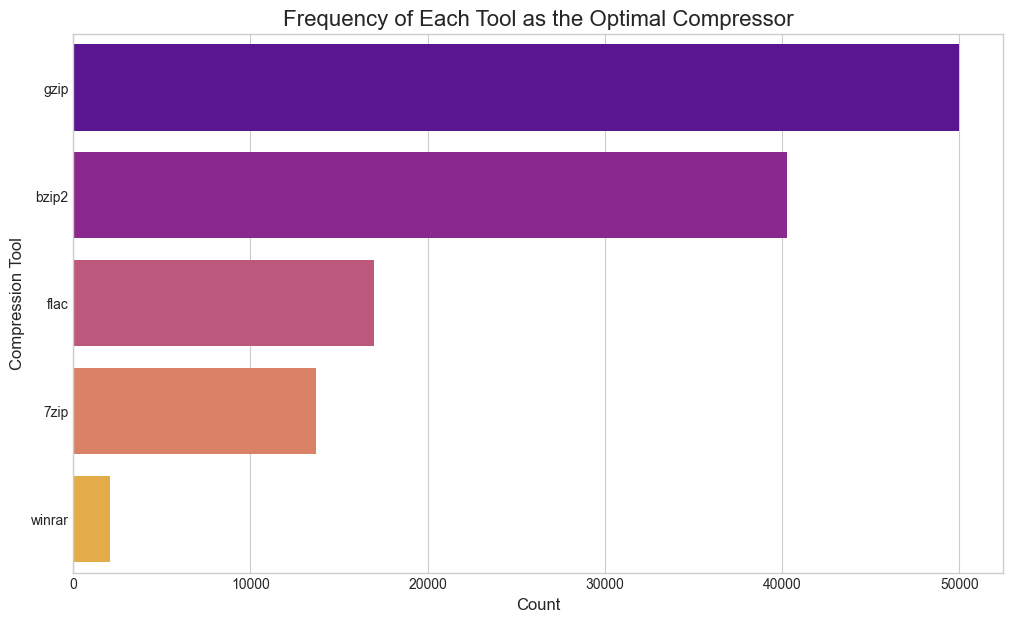

In [ ]:
# @title
# b) Distribution of the Target Label ('best_tool')
print("\n b. Distribution of Optimal Compression Tools (Target Label) ")
best_tool_counts = df['best_tool'].value_counts()
print(best_tool_counts)
plt.figure(figsize=(12, 7))
sns.countplot(y='best_tool', data=df, order=best_tool_counts.index, palette='plasma')
plt.title('Frequency of Each Tool as the Optimal Compressor', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Compression Tool', fontsize=12)
plt.show()


 Plot 1 & 2: Feature Distributions per Optimal Compression Tool


C:\Users\suhas\AppData\Local\Temp\ipykernel_3312\2465014834.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='best_tool', y='entropy', data=df, palette='magma')


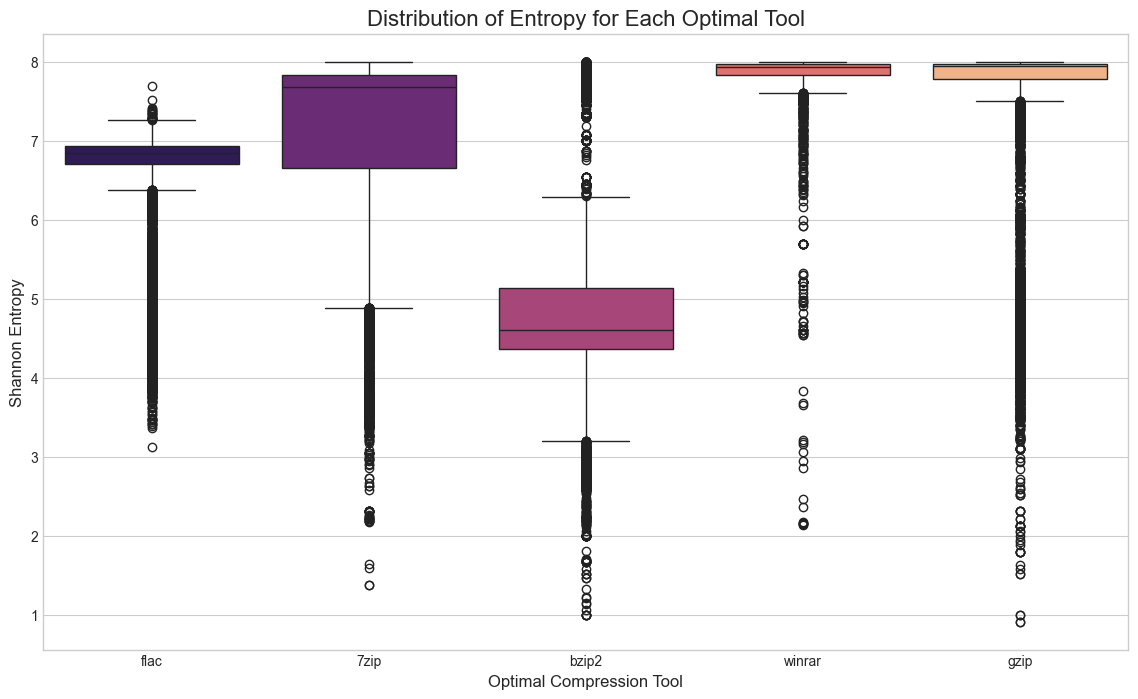

In [ ]:
# @title
plt.style.use('seaborn-v0_8-whitegrid')

# How do key features relate to the BEST TOOL?
# INSIGHT: This directly tests our project's core hypothesis. If the distributions are different,
# the feature is a good predictor for the model to learn from.

print("\n Plot 1 & 2: Feature Distributions per Optimal Compression Tool")

# Plot for Entropy
plt.figure(figsize=(14, 8))
sns.boxplot(x='best_tool', y='entropy', data=df, palette='magma')
plt.title('Distribution of Entropy for Each Optimal Tool', fontsize=16)
plt.xlabel('Optimal Compression Tool', fontsize=12)
plt.ylabel('Shannon Entropy', fontsize=12)
plt.show()

C:\Users\suhas\AppData\Local\Temp\ipykernel_3312\3488960738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='best_tool', y='file_size', data=df, palette='magma')


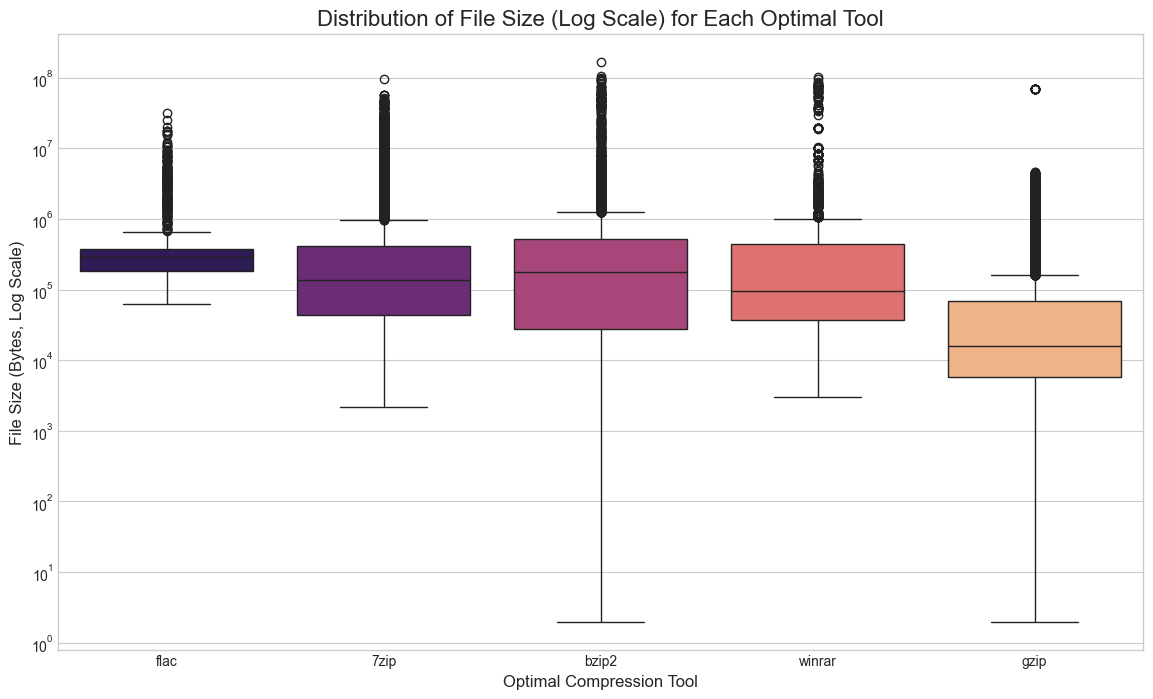

In [ ]:
# @title
# Plot for File Size (Log Scale)
plt.figure(figsize=(14, 8))
sns.boxplot(x='best_tool', y='file_size', data=df, palette='magma')
plt.yscale('log') # Using a log scale is CRUCIAL for visualizing skewed data like file size
plt.title('Distribution of File Size (Log Scale) for Each Optimal Tool', fontsize=16)
plt.xlabel('Optimal Compression Tool', fontsize=12)
plt.ylabel('File Size (Bytes, Log Scale)', fontsize=12)
plt.show()


 Plot 3: The 'Fingerprint' of Each File Type


<Figure size 1600x900 with 0 Axes>

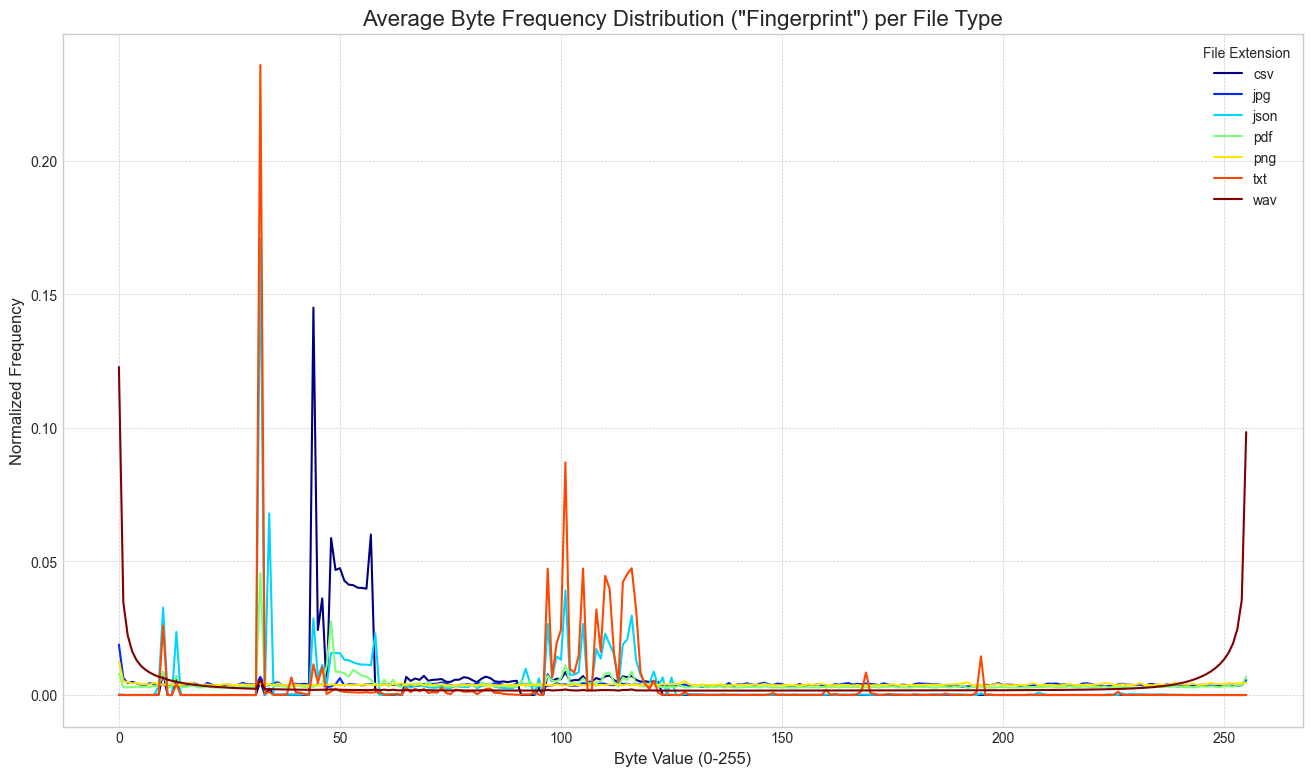

In [ ]:
# @title
# The "Fingerprint" - Average Byte Distribution per File Type
# INSIGHT: This visualizes the core "texture" of each file type. It shows the fundamental patterns
# our DL models will learn from the 256 byte_ features.

print("\n Plot 3: The 'Fingerprint' of Each File Type")

byte_cols = [f'{i}' for i in range(256)]
# Group by file extension and calculate the mean for each byte frequency column
avg_byte_dist = df.groupby('file_extension')[byte_cols].mean()

plt.figure(figsize=(16, 9))
# We transpose (.T) the dataframe so that byte numbers are on the x-axis
avg_byte_dist.T.plot(figsize=(16, 9), colormap='jet')
plt.title('Average Byte Frequency Distribution ("Fingerprint") per File Type', fontsize=16)
plt.xlabel('Byte Value (0-255)', fontsize=12)
plt.ylabel('Normalized Frequency', fontsize=12)
plt.legend(title='File Extension')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


 Plot 4: Correlation Heatmap of Key Numerical Features


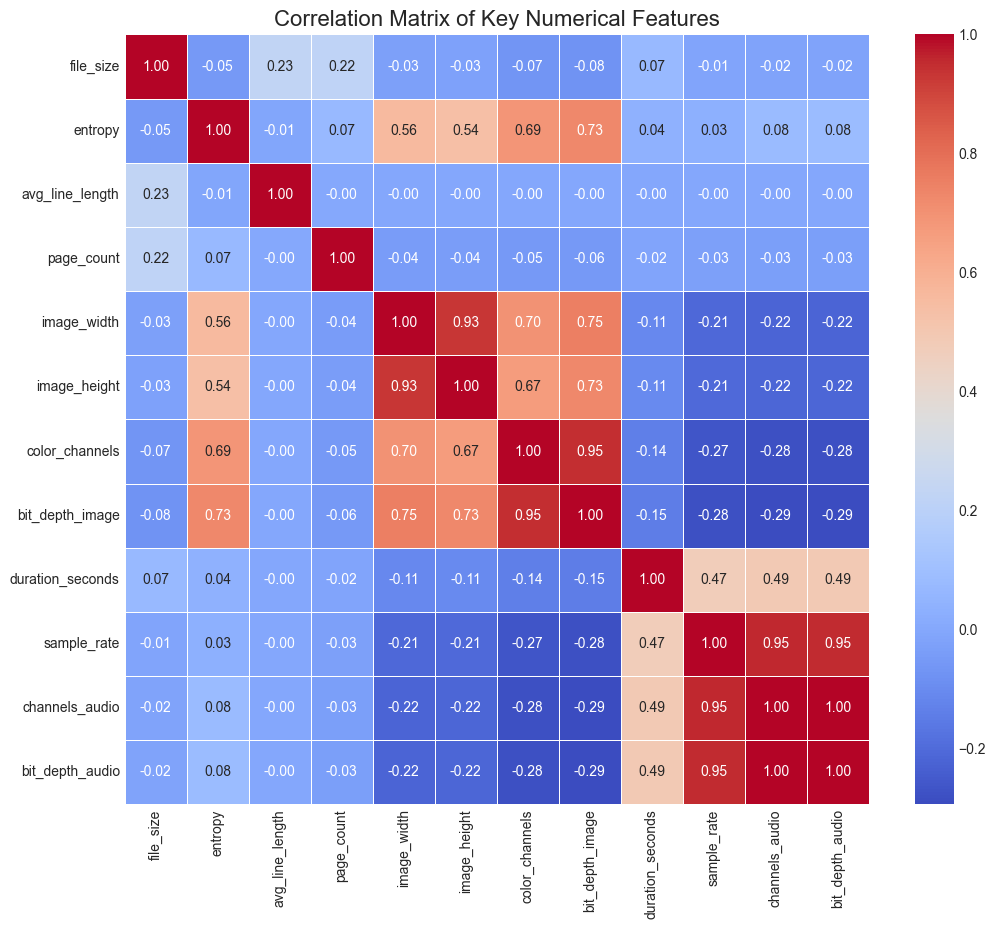

In [ ]:
# @title
# Correlation Heatmap of Key Features
# INSIGHT: This helps us understand if any of our hand-engineered features are redundant.
# High correlation between two features means they might be providing similar information.

print("\n Plot 4: Correlation Heatmap of Key Numerical Features")

# We select the main non-byte features for a readable heatmap
features_for_corr = [
    'file_size', 'entropy', 'avg_line_length', 'page_count', 'image_width',
    'image_height', 'color_channels', 'bit_depth_image', 'duration_seconds',
    'sample_rate', 'channels_audio', 'bit_depth_audio'
]
correlation_matrix = df[features_for_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Key Numerical Features', fontsize=16)
plt.show()


In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

extension_map = {
    'txt': 'Text', 'csv': 'Text', 'json': 'Text',
    'pdf': 'Document',
    'jpg': 'Image', 'jpeg': 'Image', 'png': 'Image',
    'wav': 'Audio'
}
df['file_category'] = df['file_extension'].map(extension_map)

print("Section III.C: Comprehensive Outlier and Anomaly Identification")


# Part 1: Sanity Check for Impossible Values (Bug Hunting)
print("\n 1. Analysis of Impossible/Erroneous Values")
entropy_outliers = df[(df['entropy'] < 0) | (df['entropy'] > 8)]
print(f"Number of files with entropy outside valid [0, 8] range: {len(entropy_outliers)}")
image_extensions = ['jpg', 'jpeg', 'png']
non_image_df = df[~df['file_extension'].isin(image_extensions)]
image_features = ['image_width', 'image_height', 'color_channels', 'bit_depth_image']
contradiction_image = non_image_df[non_image_df[image_features].sum(axis=1) > 0]
print(f"Number of non-image files with non-zero image features: {len(contradiction_image)}")
audio_extensions = ['wav']
non_audio_df = df[~df['file_extension'].isin(audio_extensions)]
audio_features = ['duration_seconds', 'sample_rate', 'channels_audio', 'bit_depth_audio']
contradiction_audio = non_audio_df[non_audio_df[audio_features].sum(axis=1) > 0]
print(f"Number of non-audio files with non-zero audio features: {len(contradiction_audio)}")

Section III.C: Comprehensive Outlier and Anomaly Identification

 1. Analysis of Impossible/Erroneous Values
Number of files with entropy outside valid [0, 8] range: 0
Number of non-image files with non-zero image features: 0
Number of non-audio files with non-zero audio features: 0


In [ ]:
# @title
#Part 2: Comprehensive Identification of Statistical Outliers
def calculate_outliers(dataframe, value_col):
    """A helper function to calculate the number of statistical outliers."""
    Q1 = dataframe[value_col].quantile(0.25)
    Q3 = dataframe[value_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[value_col] < lower_bound) | (dataframe[value_col] > upper_bound)]
    return len(outliers)


 2. Comprehensive Analysis of Statistical Outliers (using 1.5 * IQR method)

 a) Universal Features 


C:\Users\suhas\AppData\Local\Temp\ipykernel_3312\2641737426.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='file_category', y=feature, data=df, palette='viridis')


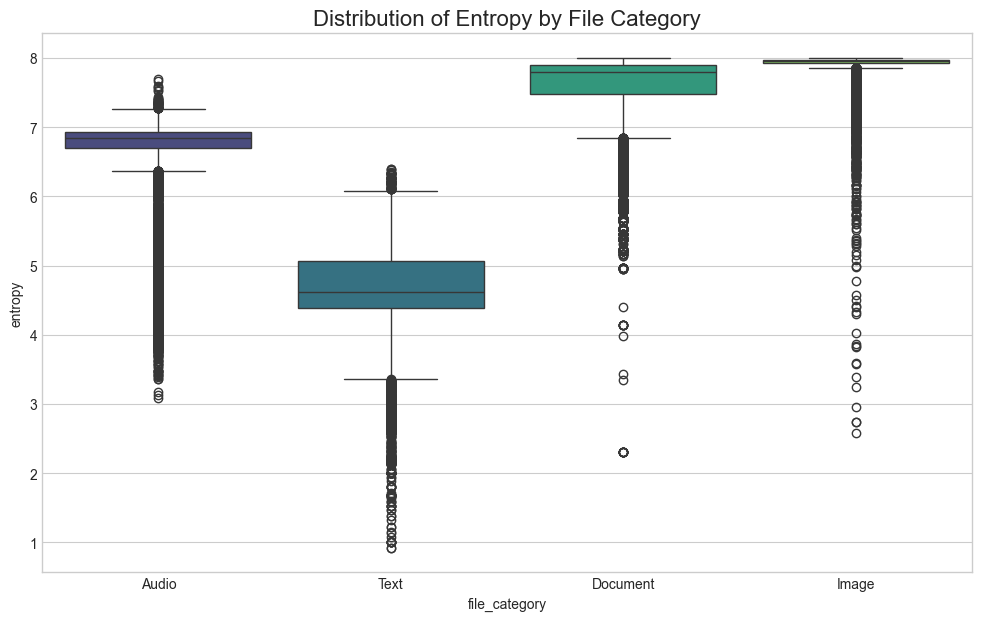

Statistical Outlier Counts for 'entropy':
  - Category 'Audio': Found 2261 outliers.
  - Category 'Text': Found 2446 outliers.
  - Category 'Document': Found 1395 outliers.
  - Category 'Image': Found 4211 outliers.


C:\Users\suhas\AppData\Local\Temp\ipykernel_3312\2641737426.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='file_category', y=feature, data=df, palette='viridis')


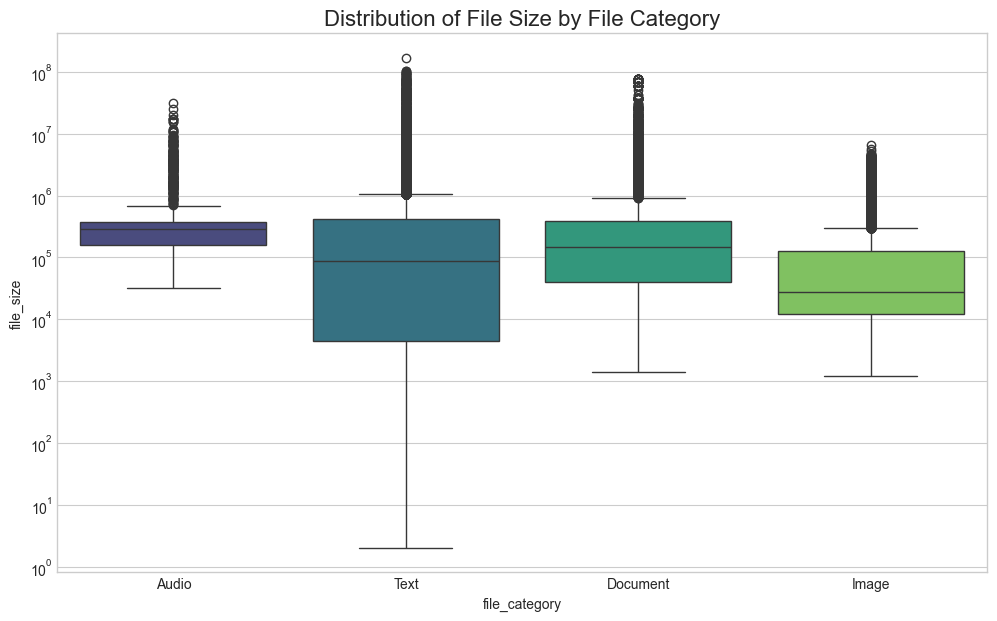

Statistical Outlier Counts for 'file_size':
  - Category 'Audio': Found 216 outliers.
  - Category 'Text': Found 4317 outliers.
  - Category 'Document': Found 1656 outliers.
  - Category 'Image': Found 5756 outliers.


In [ ]:
# @title
print("\n 2. Comprehensive Analysis of Statistical Outliers (using 1.5 * IQR method)")

# Universal Features
print("\n a) Universal Features ")
universal_features_to_plot = ['entropy', 'file_size']
for feature in universal_features_to_plot:
    plt.figure(figsize=(12, 7))
    y_scale = 'log' if feature == 'file_size' else 'linear'
    sns.boxplot(x='file_category', y=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature.replace("_", " ").title()} by File Category', fontsize=16)
    plt.yscale(y_scale)
    plt.show()
    print(f"Statistical Outlier Counts for '{feature}':")
    for category in df['file_category'].unique():
        subset = df[df['file_category'] == category]
        num_outliers = calculate_outliers(subset, feature)
        if num_outliers > 0:
            print(f"  - Category '{category}': Found {num_outliers} outliers.")

In [ ]:
# @title
#  Format-Specific Features
print("\n b) Format-Specific Features")
# Image Features
print("\n- Image Feature Outliers (calculated on Image files only):")
df_images = df[df['file_category'] == 'Image']
for feature in image_features:
    num_outliers = calculate_outliers(df_images, feature)
    print(f"  - '{feature}': Found {num_outliers} outliers.")

# Audio Features
print("\n- Audio Feature Outliers (calculated on Audio files only):")
df_audio = df[df['file_category'] == 'Audio']
for feature in audio_features:
    num_outliers = calculate_outliers(df_audio, feature)
    print(f"  - '{feature}': Found {num_outliers} outliers.")

# Text/Document Features
print("\n- Text Feature Outliers (calculated on Text files only):")
df_text_doc = df[df['file_category'].isin(['Text'])]
text_doc_features = ['avg_line_length']
for feature in text_doc_features:
    num_outliers = calculate_outliers(df_text_doc, feature)
    print(f"  - '{feature}': Found {num_outliers} outliers.")

#Document Features
print("\n Document Feature Outliers (calculated on Doc files only):")
df_text_doc = df[df['file_category'].isin(['Document'])]
text_doc_features = ['page_count']
for feature in text_doc_features:
    num_outliers = calculate_outliers(df_text_doc, feature)
    print(f"  - '{feature}': Found {num_outliers} outliers.")


 b) Format-Specific Features

- Image Feature Outliers (calculated on Image files only):
  - 'image_width': Found 94 outliers.
  - 'image_height': Found 96 outliers.
  - 'color_channels': Found 11305 outliers.
  - 'bit_depth_image': Found 2 outliers.

- Audio Feature Outliers (calculated on Audio files only):
  - 'duration_seconds': Found 201 outliers.
  - 'sample_rate': Found 1788 outliers.
  - 'channels_audio': Found 5 outliers.
  - 'bit_depth_audio': Found 0 outliers.

- Text Feature Outliers (calculated on Text files only):
  - 'avg_line_length': Found 4571 outliers.

 Document Feature Outliers (calculated on Doc files only):
  - 'page_count': Found 1507 outliers.


In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

print("Section IV: Data Engineering for Deep Learning")

# Part D: Encoding Categorical Variables
print("\n D. Encoding Categorical Variables")

# D1. Encode the Target Variable ('best_tool')
print("\n1. Applying Label Encoding to the 'best_tool' target variable...")
label_encoder = LabelEncoder()
df['best_tool_encoded'] = label_encoder.fit_transform(df['best_tool'])

# It's very useful to see the mapping
class_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("   - Target variable has been encoded.")
print(f"   - Class Mapping: {class_mapping}")

# Display a comparison of the original and encoded columns
print("\n Original vs. Encoded Target")
print(df[['best_tool', 'best_tool_encoded']].head())

# D2. Drop the original string version and non-feature columns
# The model only needs the encoded version. We also drop identifiers.
df_model_ready = df.drop(columns=['best_tool', 'file_name', 'file_extension'])
print("\nDropped original 'best_tool' string column and identifier columns.")


Section IV: Data Engineering for Deep Learning

 D. Encoding Categorical Variables

1. Applying Label Encoding to the 'best_tool' target variable...
   - Target variable has been encoded.
   - Class Mapping: {0: '7zip', 1: 'bzip2', 2: 'flac', 3: 'gzip', 4: 'winrar'}

 Original vs. Encoded Target
  best_tool  best_tool_encoded
0      flac                  2
1      flac                  2
2      flac                  2
3      flac                  2
4      flac                  2

Dropped original 'best_tool' string column and identifier columns.


In [ ]:
# @title
df_model_ready.head()

,file_size,entropy,avg_line_length,page_count,image_width,image_height,color_channels,bit_depth_image,duration_seconds,sample_rate,...,248,249,250,251,252,253,254,255,file_category,best_tool_encoded
0,160044,7.274756,0.0,0,0,0,0,0,5.000,16000,...,0.017095,0.017964,0.018764,0.020094,0.021625,0.021538,0.022762,0.022856,Audio,2
1,375720,3.798532,0.0,0,0,0,0,0,3.303,48000,...,0.001094,0.001216,0.001453,0.001621,0.002111,0.004466,0.015501,0.105994,Audio,2
2,410114,4.107836,0.0,0,0,0,0,0,3.637,48000,...,0.001336,0.001458,0.001729,0.002331,0.004316,0.008544,0.018617,0.106285,Audio,2
3,374522,3.871851,0.0,0,0,0,0,0,3.303,48000,...,0.001202,0.001194,0.001453,0.001837,0.002756,0.006307,0.015225,0.099036,Audio,2
4,367496,3.760627,0.0,0,0,0,0,0,3.337,48000,...,0.001401,0.001488,0.001589,0.001608,0.001989,0.003614,0.013086,0.124067,Audio,2


In [ ]:
# @title
# Part E: Data Transformation or Scaling Methods Used
print("\n E. Data Transformation and Scaling ")

# First, separate the features (X) from the target (y)
X = df_model_ready.drop(columns=['best_tool_encoded'])
y = df_model_ready['best_tool_encoded']

# We still have the ratio_* columns in X, which were only for training. Let's remove them.
ratio_cols = ['ratio_7zip', 'ratio_winrar', 'ratio_zip', 'ratio_gzip', 'ratio_bzip2', 'ratio_flac']
X = X.drop(columns=[col for col in ratio_cols if col in X.columns])
print("Removed temporary 'ratio_*' columns from the feature set.")

# Remove the 'file_category' column as it is not a numerical feature
X = X.drop(columns=['file_category'])
print("Removed 'file_category' column before scaling.")

# Now, apply StandardScaler to ALL feature columns
print("\nApplying StandardScaler to all numerical features...")
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)

# Convert the scaled numpy array back to a DataFrame for visualization
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)
print("   - All features have been scaled to have a mean of ~0 and a standard deviation of ~1.")


 E. Data Transformation and Scaling 
Removed temporary 'ratio_*' columns from the feature set.
Removed 'file_category' column before scaling.

Applying StandardScaler to all numerical features...
   - All features have been scaled to have a mean of ~0 and a standard deviation of ~1.



 Visualization: Feature Distribution Before and After Scaling 


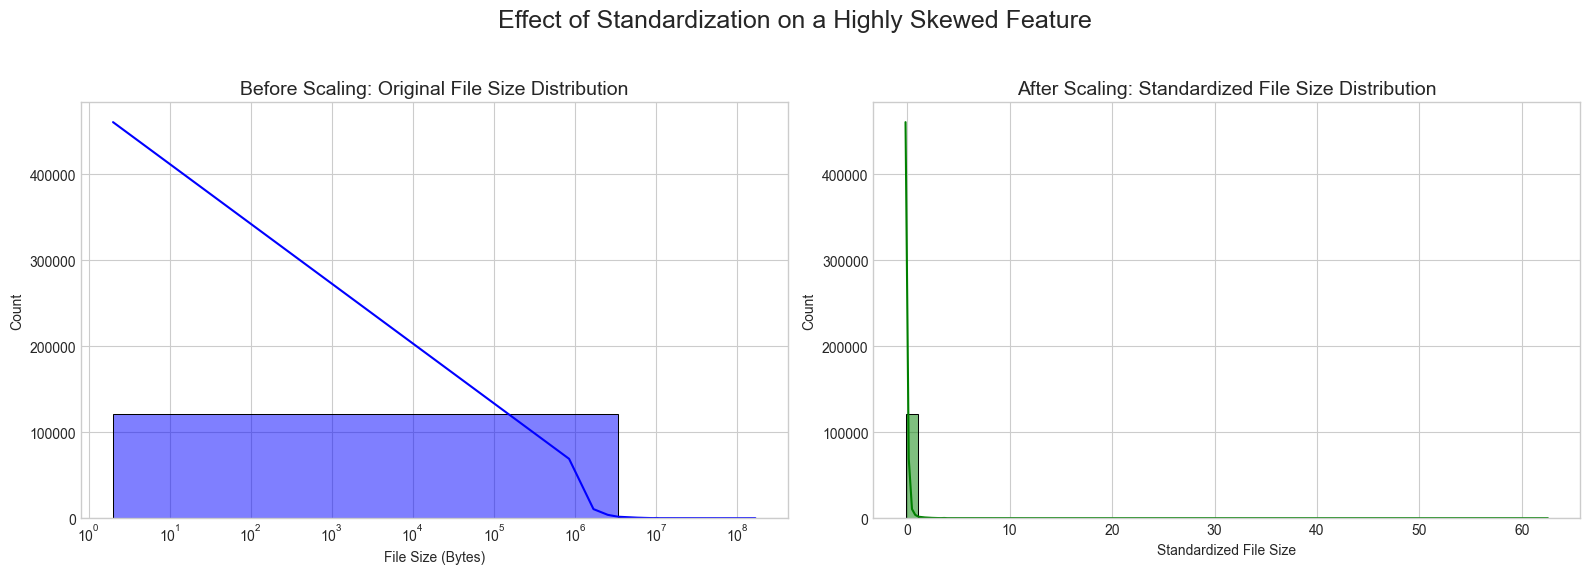


 Data Engineering Complete 


In [ ]:
# @title
# Generate Visualization
print("\n Visualization: Feature Distribution Before and After Scaling ")

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the original distribution of 'file_size'
sns.histplot(df['file_size'], bins=50, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Before Scaling: Original File Size Distribution', fontsize=14)
axes[0].set_xlabel('File Size (Bytes)')
axes[0].set_xscale('log') # Use log scale to see the original shape

# Plot the scaled distribution of 'file_size'
sns.histplot(X_scaled['file_size'], bins=50, ax=axes[1], kde=True, color='green')
axes[1].set_title('After Scaling: Standardized File Size Distribution', fontsize=14)
axes[1].set_xlabel('Standardized File Size')

plt.suptitle('Effect of Standardization on a Highly Skewed Feature', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


print("\n Data Engineering Complete ")

In [ ]:
# @title
import joblib
joblib.dump(scaler, 'my_scaler.gz')


['my_scaler.gz']

 # **PHASE 2: MODEL BUILDING AND TESTING**
---

## 1. **Baseline Multi-Layer Perceptron (MLP)**
- **Role:** The fundamental baseline.
- **Architecture:**  
  `Input → Dense → ReLU → Dense → ReLU → Softmax`
- **Purpose:** Establishes the minimum performance expected from a standard neural network.  
  All other models must outperform this.

---

## 2. **Robust MLP (with Batch Normalization and Dropout)**
- **Role:** The industry-standard, regularized baseline.
- **Architecture:**  
  `Input → (Dense → BatchNorm → ReLU → Dropout) × N → Softmax`
- **Purpose:**  
  - Addresses high risk of overfitting in the high-dimensional dataset.  
  - Improves training stability.  
  - Tests how much performance improves with regularization techniques.

---

## 3. **Wide & Deep Network**
- **Role:** The hybrid architecture for combining simple rules and complex patterns.
- **Architecture:**  
  - **Wide Path:** Linear model with key interpretable features  
    *(e.g., file_size, entropy, duration_seconds)*  
  - **Deep Path:** The "Robust MLP" (Model #2) on all 270+ features.  
  - Outputs from both paths are concatenated before final prediction.
- **Purpose:**  
  Tests the hypothesis that combining:  
  - **Memorization** (Wide part: simple rules)  
  - **Generalization** (Deep part: complex patterns)  
  can outperform a deep-only approach.

---

### **4. ResNet-style Deep MLP**

*   **Role:** The deep architecture model.
*   **Architecture:**
    *   `Input → Initial Dense Layer → (Residual Block) × N → Softmax`
    *   **Residual Block:** A specialized component where the input to the block is added back to its output via a "skip connection." Each block contains multiple `Dense`, `BatchNormalization`, `ReLU`, and `Dropout` layers.
*   **Purpose:**
    *   To test the hypothesis that a **deeper architecture** can learn more complex patterns from the high-dimensional feature set.
    *   Standard deep MLPs are difficult to train due to the "vanishing gradient" problem. The **residual skip connections** are a classic solution that enables the effective training of much deeper networks. This model specifically investigates if adding depth, enabled by this technique, improves performance over the standard "Robust MLP."

---

### **5. DL-ML Hybrid (Deep Feature Extractor + XGBoost)**

*   **Role:** The ultimate hybrid, combining deep representation learning with a powerful tree-based classifier.
*   **Architecture (Two-Stage Pipeline):**
    1.  **Stage 1 (Feature Extractor):** A **tuned "Robust MLP"** (similar to Model #2) is trained for the classification task. Its final classification layer is then removed, turning it into a specialized feature extractor. This stage transforms the 270+ raw input features into 64 powerful, abstract features.
    2.  **Stage 2 (Classifier):** A **tuned XGBoost model** is trained, using only the 64 abstract features generated by the MLP as its input.
*   **Purpose:**
    *   To test the hypothesis that the two core tasks of machine learning—**representation learning** and **classification**—can be optimized by using the best tool for each job.
    *   It leverages the Deep Neural Network for what it does best: automatically learning complex, high-level features from raw data.
    *   It then leverages the XGBoost model for what *it* does best: building a highly effective and robust classifier on a well-defined, structured feature set.
    *   This model directly compares the performance of a simple Softmax layer against a state-of-the-art tree-based model for the final classification step.

In [ ]:
# PHASE 2 SETUP: DATA SPLITTING AND PREPARATION
print("Starting Phase 2 Setup")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# 1. Train-Test Split on the Full Dataset
print("Performing an 80/20 train-test split on the full dataset...")

# Assumes X_scaled (numpy array) and y (numpy array or pandas series) are in memory from Phase 1
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.20,      # 20% for testing
    random_state=42,     # Ensures the split is reproducible every time
    stratify=y           # Preserves class distribution due to the imbalance found in EDA
)

print(f"Full dataset shape: {X_scaled.shape}")
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape:  X_test={X_test.shape}, y_test={y_test.shape}")


# 2. Calculate Class Weights (to handle imbalance)
# This directly addresses the class imbalance found in the EDA.
print("\nCalculating class weights for model training...")
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

print("Class weights calculated:")
for i, weight in class_weight_dict.items():
    class_name = label_encoder.inverse_transform([i])[0]
    print(f"  - Class '{class_name}' (label {i}): {weight:.2f}")


print("\n Phase 2 Setup Complete")
print("Variables ready for model training: X_train, X_test, y_train, y_test, class_weight_dict")

#**Phase 3: Model Fine-Tuning & Application Building**

### **Model Fine-Tuning (Completed in Phase 2)**

The model fine-tuning, originally planned for Phase 3, was completed ahead of schedule during the Phase 2 model building process. We did not train separate base models; instead, each of our five models was directly created using automated hyperparameter optimization to find its best-performing configuration from the outset.

Therefore, the code and results presented under **Phase 3 in this notebook represent the complete work for both the model building and fine-tuning stages.**

**Techniques Employed:**
*   **KerasTuner (Hyperband Algorithm):** Used to fine-tune the architectural and training parameters (e.g., number of layers, units, learning rate, dropout) for the four end-to-end deep learning models (Baseline MLP, Robust MLP, Wide & Deep, ResNet) and for the **deep feature extractor component** of the DL-ML Hybrid model.
*   **GridSearchCV:** Used to perform an exhaustive search for the optimal parameters (e.g., `n_estimators`, `max_depth`) of the **XGBoost classifier component** of the DL-ML Hybrid model.

### **Application Building**

The final web application was developed as a standalone project, separate from this research notebook, using dedicated `.py` scripts and custom styling. This modular approach ensures a clean separation between our experimental work and the final, deployed product.

#Model 1: Baseline Multi-Layer Perceptron (MLP)

In [ ]:
# --- MODEL 1: TUNED BASELINE MLP (WITH KERASTUNER) ---
print("--- Starting Model 1: Tuned Baseline MLP ---")
# This model uses a standard MLP architecture and is tuned to find its optimal configuration,
# serving as a strong, optimized baseline for comparison.

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
import keras_tuner as kt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle

# --- 1. Define the Model-Building Function for KerasTuner ---
# Note: This version does NOT include Batch Norm or Dropout.
def build_baseline_mlp_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    # Tune the number of hidden layers (1 to 3)
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tune the number of units in each layer
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=64, max_value=256, step=64),
            activation='relu'
        ))

    # Final classification head
    model.add(Dense(len(class_weight_dict), activation='softmax'))

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# --- 2. Run the KerasTuner Search ---
tuner_base_mlp = kt.Hyperband(
    build_baseline_mlp_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='keras_tuner_base_mlp_dir',
    project_name='baseline_mlp_tuning'
)

early_stopping_tuner = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

print("\n--- Starting Hyperparameter Search for Baseline MLP Model ---")
tuner_base_mlp.search(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping_tuner]
)

# --- 3. Train the Final, Best Model ---
best_hps_base_mlp = tuner_base_mlp.get_best_hyperparameters(num_trials=1)[0]
print(f"\nBest Baseline MLP hyperparameters found: {best_hps_base_mlp.get_config()['values']}")

final_base_mlp_model = tuner_base_mlp.hypermodel.build(best_hps_base_mlp)
final_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_base_mlp = final_base_mlp_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=256,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,
    callbacks=[final_early_stopping]
)

Trial 90 Complete [00h 00m 34s]
val_accuracy: 0.8421935439109802

Best val_accuracy So Far: 0.9411465525627136
Total elapsed time: 00h 36m 35s

Best Baseline MLP hyperparameters found: {'num_layers': 3, 'units_0': 256, 'learning_rate': 0.0001, 'units_1': 64, 'units_2': 64, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0049'}
Epoch 1/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7438 - loss: 0.6824 - val_accuracy: 0.8497 - val_loss: 0.4681
Epoch 2/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8591 - loss: 0.4406 - val_accuracy: 0.8746 - val_loss: 0.3785
Epoch 3/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8754 - loss: 0.3825 - val_accuracy: 0.8884 - val_loss: 0.3312
Epoch 4/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8830 - loss: 0.3475 - val_accuracy: 0.8890 - val_loss: 0.3239
Epoch 5/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8908 - loss: 0.3182 - val_accura


--- Evaluating Final Tuned Baseline MLP Model on Test Data ---

--- Generating predictions ---
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step

 Classification Report for Tuned Baseline MLP Model
Number of test samples: 24596
              precision    recall  f1-score   support

        7zip       0.83      0.84      0.83      2734
       bzip2       0.95      0.94      0.94      8053
        flac       0.97      1.00      0.98      3394
        gzip       0.95      0.93      0.94      9997
      winrar       0.57      0.84      0.68       418

    accuracy                           0.93     24596
   macro avg       0.85      0.91      0.88     24596
weighted avg       0.93      0.93      0.93     24596


 Confusion Matrix for Tuned Baseline MLP Model


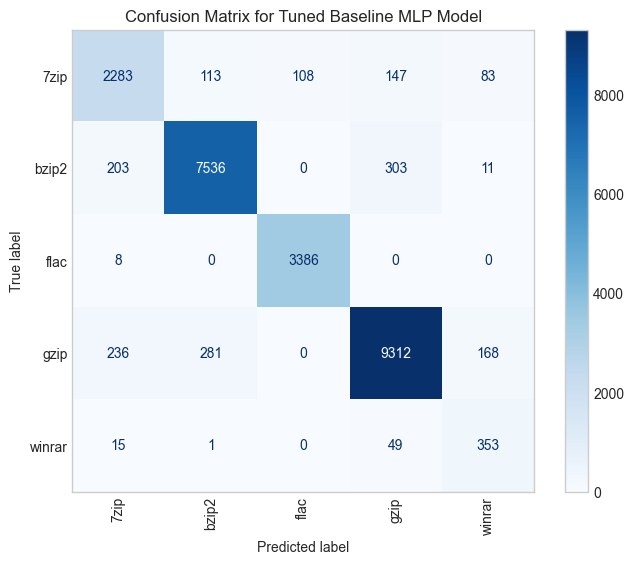


 Baseline MLP Final Model Training History


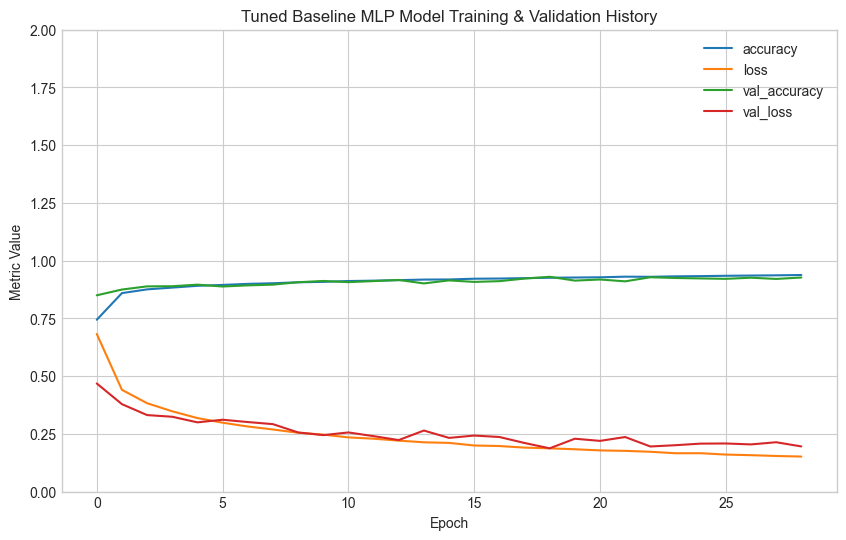


 AUC ROC Curves for Tuned Baseline MLP Model

 Exact AUC Scores 
AUC of class '7zip': 0.9852015639500205
AUC of class 'bzip2': 0.9937051749262029
AUC of class 'flac': 0.9998592682326086
AUC of class 'gzip': 0.9914607542068087
AUC of class 'winrar': 0.9909247641396485
Macro-average AUC: 0.9922406745310068


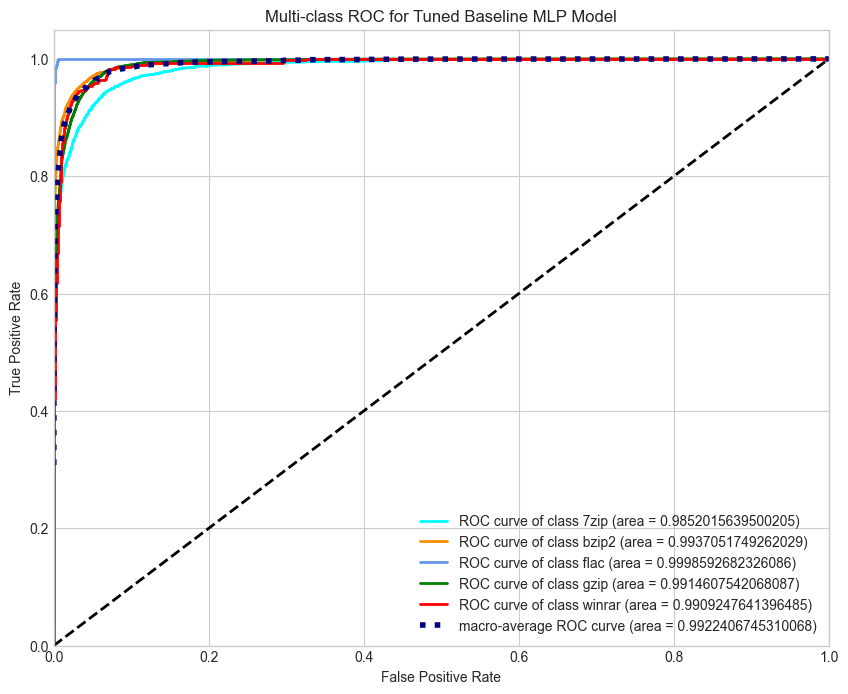


 Saving the final Tuned Baseline MLP model
Model successfully saved to 'tuned_baseline_mlp_model.h5'


In [ ]:
# --- 4. Full Evaluation of the Tuned Baseline MLP Model ---
print("\n--- Evaluating Final Tuned Baseline MLP Model on Test Data ---")

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# --- Generate predictions on the test set ---
print("\n--- Generating predictions ---")
y_pred_prob_base_mlp = final_base_mlp_model.predict(X_test)
y_pred_base_mlp = np.argmax(y_pred_prob_base_mlp, axis=1)
class_names = label_encoder.classes_
n_classes = len(class_names)


# A. Evaluation Metrics Used: Classification Report
print("\n Classification Report for Tuned Baseline MLP Model")
print(f"Number of test samples: {len(y_test)}")
print(classification_report(y_test, y_pred_base_mlp, target_names=class_names))


# B. Performance Comparison: Confusion Matrix Heatmap
print("\n Confusion Matrix for Tuned Baseline MLP Model")
cm_base_mlp = confusion_matrix(y_test, y_pred_base_mlp)
disp_base_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_base_mlp, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_base_mlp.plot(ax=ax, xticks_rotation='vertical', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Tuned Baseline MLP Model")
plt.grid(False)
plt.show()


# C. Visualizations: Training History
print("\n Baseline MLP Final Model Training History")
pd.DataFrame(history_base_mlp.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title("Tuned Baseline MLP Model Training & Validation History")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.show()


# D. Visualizations: AUC ROC Graph
print("\n AUC ROC Curves for Tuned Baseline MLP Model")
y_test_binarized = label_binarize(y_test, classes=range(n_classes))
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob_base_mlp[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print("\n Exact AUC Scores ")
for i in range(n_classes):
    print(f"AUC of class '{class_names[i]}': {roc_auc[i]}")
print(f"Macro-average AUC: {roc_auc['macro']}")

plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]})')
plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (area = {roc_auc["macro"]})',
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Tuned Baseline MLP Model')
plt.legend(loc="lower right")
plt.show()


# Save the final tuned model
print("\n Saving the final Tuned Baseline MLP model")
final_base_mlp_model.save('tuned_baseline_mlp_model.h5')
print("Model successfully saved to 'tuned_baseline_mlp_model.h5'")


#Model 2: Robust MLP (with Batch Normalization and Dropout)

In [ ]:
# MODEL 2: ROBUST MLP (WITH BATCH NORM & DROPOUT)
print(" Starting Model 2: Robust MLP with Hyperparameter Tuning ")
# This model serves as the industry-standard baseline, incorporating regularization
# to prevent overfitting and improve training stability.

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
import keras_tuner as kt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle

# 1. Define the Model-Building Function for KerasTuner
def build_robust_mlp_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    # Tune the number of hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tune the number of units in each layer
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=64, max_value=256, step=64),
            activation='relu'
        ))
        model.add(BatchNormalization())
        # Tune the dropout rate for each layer
        model.add(Dropout(hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)))

    # Final classification head
    model.add(Dense(len(class_weight_dict), activation='softmax'))

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# 2. Run the KerasTuner Search
tuner_robust_mlp = kt.Hyperband(
    build_robust_mlp_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='keras_tuner_robust_mlp_dir',
    project_name='robust_mlp_tuning'
)

early_stopping_tuner = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

print("\n Starting Hyperparameter Search for Robust MLP Model ")
tuner_robust_mlp.search(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping_tuner]
)

# 3. Train the Final, Best Model
best_hps_robust_mlp = tuner_robust_mlp.get_best_hyperparameters(num_trials=1)[0]
print(f"\nBest Robust MLP hyperparameters found: {best_hps_robust_mlp.get_config()['values']}")

final_robust_mlp_model = tuner_robust_mlp.hypermodel.build(best_hps_robust_mlp)
final_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_robust_mlp = final_robust_mlp_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=256,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,
    callbacks=[final_early_stopping]
)


Trial 90 Complete [00h 02m 11s]
val_accuracy: 0.9116182327270508

Best val_accuracy So Far: 0.9311851859092712
Total elapsed time: 00h 55m 56s

Best Robust MLP hyperparameters found: {'num_layers': 1, 'units_0': 256, 'dropout_0': 0.2, 'learning_rate': 0.001, 'units_1': 128, 'dropout_1': 0.30000000000000004, 'units_2': 256, 'dropout_2': 0.2, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0046'}
Epoch 1/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8246 - loss: 0.5071 - val_accuracy: 0.8722 - val_loss: 0.3804
Epoch 2/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8690 - loss: 0.3719 - val_accuracy: 0.8444 - val_loss: 0.4076
Epoch 3/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8784 - loss: 0.3388 - val_accuracy: 0.8749 - val_loss: 0.3384
Epoch 4/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8858 - loss: 0.3185 - val_accuracy: 0.8629 - val_loss: 0.3550
Epoch 5/100
385/385 ━━━━━━━━━━


 Evaluating Final Tuned Robust MLP Model on Test Data 

 Generating predictions 
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step

 Classification Report for Tuned Robust MLP Model 
Number of test samples: 24596
              precision    recall  f1-score   support

        7zip       0.83      0.84      0.84      2734
       bzip2       0.95      0.93      0.94      8053
        flac       0.99      0.99      0.99      3394
        gzip       0.95      0.94      0.94      9997
      winrar       0.55      0.82      0.66       418

    accuracy                           0.93     24596
   macro avg       0.85      0.90      0.87     24596
weighted avg       0.93      0.93      0.93     24596


 Confusion Matrix for Tuned Robust MLP Model


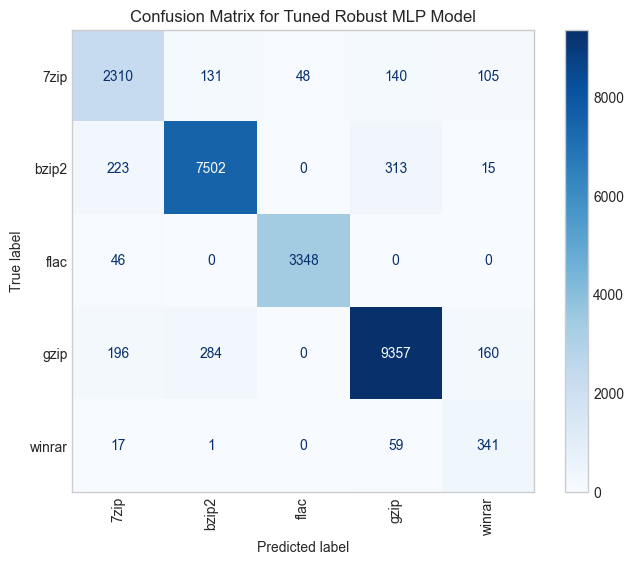


 Robust MLP Final Model Training History 


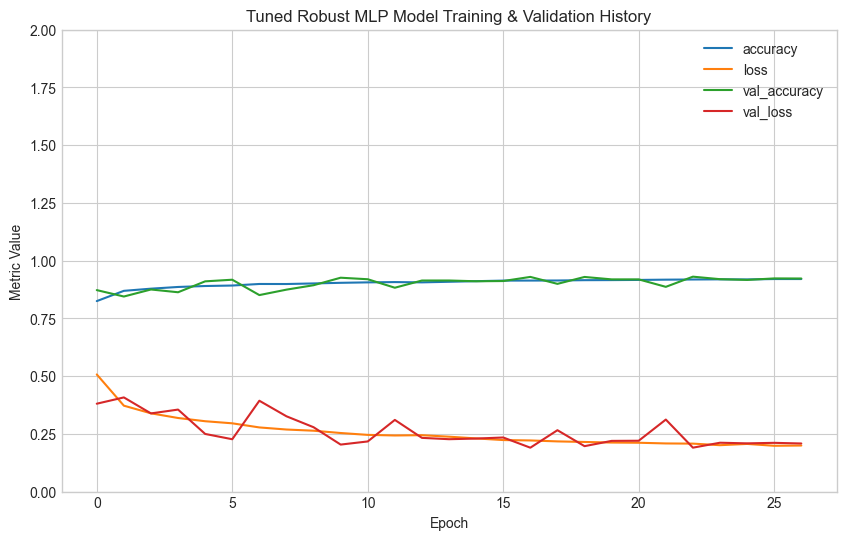


 AUC ROC Curves for Tuned Robust MLP Model

 Exact AUC Scores
AUC of class '7zip': 0.9846871313620712
AUC of class 'bzip2': 0.9931479683060555
AUC of class 'flac': 0.9998793350512236
AUC of class 'gzip': 0.9915852350060796
AUC of class 'winrar': 0.9899631956133952
Macro-average AUC: 0.9918629293558305


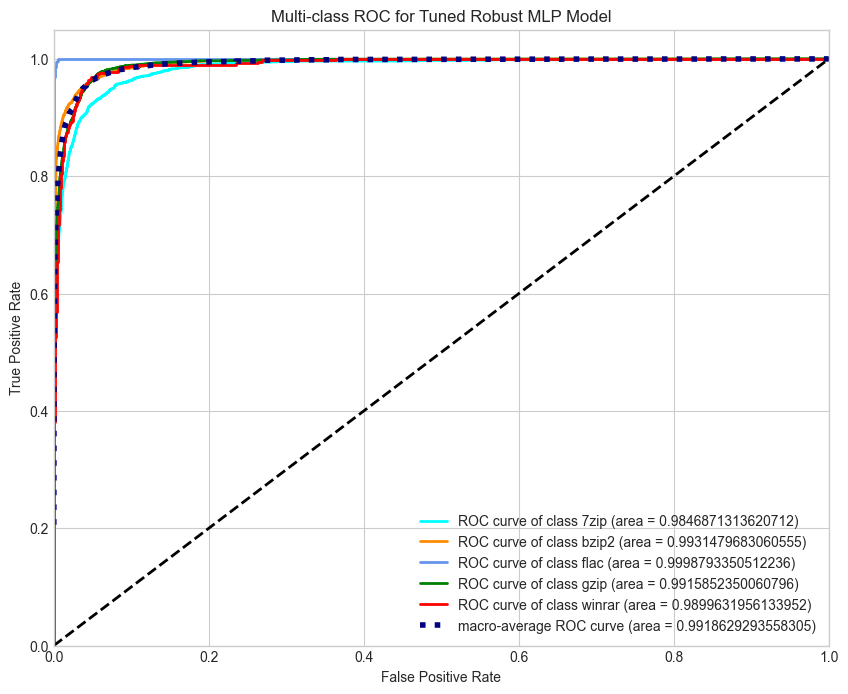


 Saving the final tuned Robust MLP model 
 Model successfully saved to 'tuned_robust_mlp_model.h5'


In [ ]:
#  4. Full Evaluation of the Tuned Robust MLP Model
print("\n Evaluating Final Tuned Robust MLP Model on Test Data ")

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Generate predictions
print("\n Generating predictions ")
y_pred_prob_robust_mlp = final_robust_mlp_model.predict(X_test)
y_pred_robust_mlp = np.argmax(y_pred_prob_robust_mlp, axis=1)
class_names = label_encoder.classes_
n_classes = len(class_names)


# A. Evaluation Metrics Used: Classification Report
print("\n Classification Report for Tuned Robust MLP Model ")
print(f"Number of test samples: {len(y_test)}")
print(classification_report(y_test, y_pred_robust_mlp, target_names=class_names))


# B. Performance Comparison: Confusion Matrix Heatmap
print("\n Confusion Matrix for Tuned Robust MLP Model")
cm_robust_mlp = confusion_matrix(y_test, y_pred_robust_mlp)
disp_robust_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_robust_mlp, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_robust_mlp.plot(ax=ax, xticks_rotation='vertical', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Tuned Robust MLP Model")
plt.grid(False)
plt.show()


# C. Visualizations: Training History
print("\n Robust MLP Final Model Training History ")
pd.DataFrame(history_robust_mlp.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title("Tuned Robust MLP Model Training & Validation History")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.show()


# D. Visualizations: AUC ROC Graph
print("\n AUC ROC Curves for Tuned Robust MLP Model")
y_test_binarized = label_binarize(y_test, classes=range(n_classes))
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob_robust_mlp[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print("\n Exact AUC Scores")
for i in range(n_classes):
    print(f"AUC of class '{class_names[i]}': {roc_auc[i]}")
print(f"Macro-average AUC: {roc_auc['macro']}")

plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]})')
plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (area = {roc_auc["macro"]})',
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Tuned Robust MLP Model')
plt.legend(loc="lower right")
plt.show()


# Save the final tuned model
print("\n Saving the final tuned Robust MLP model ")
final_robust_mlp_model.save('tuned_robust_mlp_model.h5')
print(" Model successfully saved to 'tuned_robust_mlp_model.h5'")


#Model 3: Wide & Deep Network

In [ ]:
# MODEL 3: WIDE & DEEP NETWORK (WITH KERASTUNER)
print(" Starting Model 3: Wide & Deep Network with Hyperparameter Tuning")
# This model combines a linear (wide) model with a deep neural network to learn both simple rules and complex patterns.

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, BatchNormalization, Dropout, Activation
from tensorflow.keras.models import Model
import keras_tuner as kt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle

# 1. Prepare the Data with Multiple Inputs for Wide & Deep
# We need to split the data into the features that will go into the 'wide' part and the 'deep' part.

# Let's define the 'wide' features as the hand-crafted statistical features.
# We get their indices from the original feature list 'X'.
wide_feature_names = [
    'file_size', 'entropy', 'avg_line_length', 'page_count', 'image_width',
    'image_height', 'color_channels', 'bit_depth_image', 'duration_seconds',
    'sample_rate', 'channels_audio', 'bit_depth_audio'
]
# Create a list of the original column names in the correct order
original_feature_names = [f"feature_{i}" for i in range(256)] + wide_feature_names
# Find the indices of our wide features
wide_indices = [original_feature_names.index(name) for name in wide_feature_names if name in original_feature_names]

# All features will go into the deep path
X_train_deep_path = X_train
X_test_deep_path = X_test

# Select only the wide features for the wide path
X_train_wide_path = X_train[:, wide_indices]
X_test_wide_path = X_test[:, wide_indices]

print(f"Shape of deep path input: {X_train_deep_path.shape}")
print(f"Shape of wide path input: {X_train_wide_path.shape}")


# 2. Define the Model-Building Function for KerasTuner
def build_wide_deep_model(hp):
    # Deep Path (Robust MLP)
    input_deep = Input(shape=(X_train_deep_path.shape[1],), name='deep_input')
    x_deep = input_deep

    # Tune the number and size of dense layers
    for i in range(hp.Int('num_layers', 1, 3)):
        x_deep = Dense(
            units=hp.Int(f'units_{i}', min_value=64, max_value=256, step=64),
            activation='relu'
        )(x_deep)
        x_deep = BatchNormalization()(x_deep)
        x_deep = Dropout(hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1))(x_deep)

    # Wide Path (Linear Model)
    input_wide = Input(shape=(X_train_wide_path.shape[1],), name='wide_input')

    # Concatenate the two paths
    concatenated = Concatenate()([input_wide, x_deep])

    # Final classification head
    output = Dense(len(class_weight_dict), activation='softmax')(concatenated)

    model = Model(inputs=[input_deep, input_wide], outputs=output)

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# 3. Run the KerasTuner Search
tuner_wd = kt.Hyperband(
    build_wide_deep_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='keras_tuner_wd_dir',
    project_name='wide_deep_tuning'
)

early_stopping_tuner = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

print("\n Starting Hyperparameter Search for Wide & Deep Model")
# The tuner needs a dictionary of inputs
tuner_wd.search(
    {'deep_input': X_train_deep_path, 'wide_input': X_train_wide_path}, y_train,
    epochs=100,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping_tuner]
)

# 4. Train the Final, Best Model
best_hps_wd = tuner_wd.get_best_hyperparameters(num_trials=1)[0]
print(f"\nBest Wide & Deep hyperparameters found: {best_hps_wd.get_config()['values']}")

final_wd_model = tuner_wd.hypermodel.build(best_hps_wd)
final_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_wd = final_wd_model.fit(
    {'deep_input': X_train_deep_path, 'wide_input': X_train_wide_path}, y_train,
    epochs=100,
    batch_size=256,
    validation_data=({'deep_input': X_test_deep_path, 'wide_input': X_test_wide_path}, y_test),
    class_weight=class_weight_dict,
    callbacks=[final_early_stopping]
)


Trial 90 Complete [00h 02m 23s]
val_accuracy: 0.9178186655044556

Best val_accuracy So Far: 0.9342854022979736
Total elapsed time: 01h 01m 43s

Best Wide & Deep hyperparameters found: {'num_layers': 1, 'units_0': 256, 'dropout_0': 0.2, 'learning_rate': 0.0001, 'units_1': 256, 'dropout_1': 0.30000000000000004, 'units_2': 64, 'dropout_2': 0.2, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0048'}
Epoch 1/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7593 - loss: 0.6991 - val_accuracy: 0.8475 - val_loss: 0.4832
Epoch 2/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8290 - loss: 0.4976 - val_accuracy: 0.8707 - val_loss: 0.4129
Epoch 3/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8490 - loss: 0.4409 - val_accuracy: 0.8840 - val_loss: 0.3680
Epoch 4/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8610 - loss: 0.4052 - val_accuracy: 0.8504 - val_loss: 0.4101
Epoch 5/100
385/385 ━━━━━━━━━


 Wide & Deep Final Model Training History


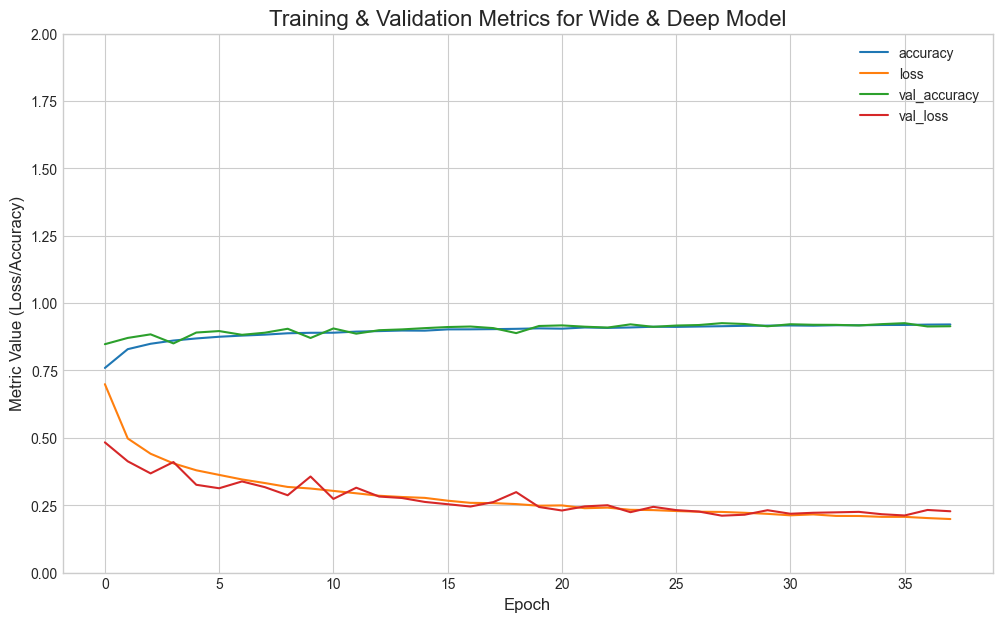

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

print("\n Wide & Deep Final Model Training History")

# Convert the history object to a pandas DataFrame and plot it
pd.DataFrame(history_wd.history).plot(figsize=(12, 7))

# Add titles and labels for clarity
plt.grid(True)
plt.title("Training & Validation Metrics for Wide & Deep Model", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Metric Value (Loss/Accuracy)", fontsize=12)

# Set a consistent y-axis limit for easy comparison across models
plt.gca().set_ylim(0, 2)

plt.show()


 Evaluating Final Tuned Wide & Deep Model on Test Data

 Sanitizing the test set to remove any data leaked from the training set
Number of overlapping (leaked) rows found: 1367
Clean test set size for Wide & Deep model: 23229 samples.

 Generating predictions
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step

--- Classification Report for Tuned Wide & Deep Model
Number of test samples: 23229
              precision    recall  f1-score   support

        7zip       0.85      0.81      0.83      2461
       bzip2       0.95      0.94      0.95      7560
        flac       0.98      0.99      0.99      3394
        gzip       0.96      0.93      0.94      9417
      winrar       0.44      0.89      0.59       397

    accuracy                           0.93     23229
   macro avg       0.83      0.91      0.86     23229
weighted avg       0.94      0.93      0.93     23229


 Confusion Matrix for Tuned Wide & Deep Model


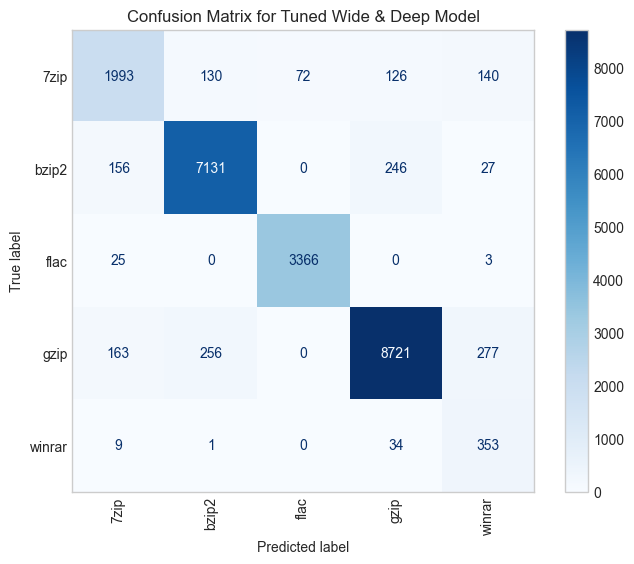


 Wide & Deep Final Model Training History 


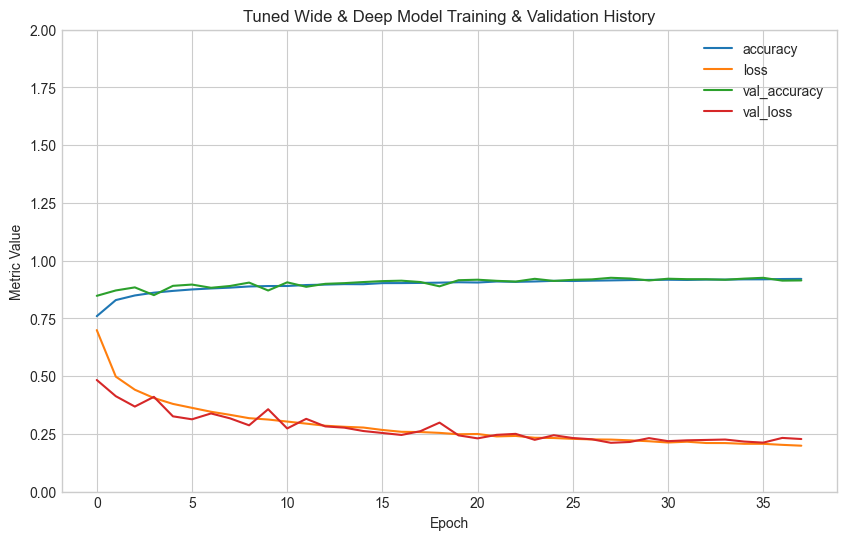


 AUC ROC Curves for Tuned Wide & Deep Model 

 Exact AUC Scores
AUC of class '7zip': 0.9829232404555753
AUC of class 'bzip2': 0.993671788497559
AUC of class 'flac': 0.9998359625424781
AUC of class 'gzip': 0.9913628300556687
AUC of class 'winrar': 0.9903773086163041
Macro-average AUC: 0.9916487267395903


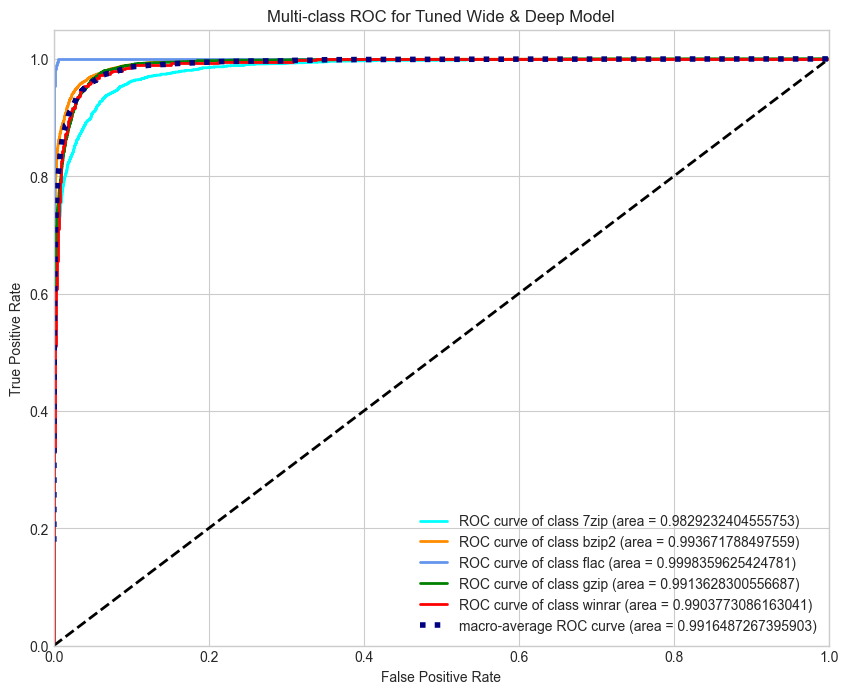


Saving the final tuned Wide & Deep model
Model successfully saved to 'tuned_wide_deep_model.h5'


In [ ]:
#  5. Full Evaluation of the Tuned Wide & Deep Model
print("\n Evaluating Final Tuned Wide & Deep Model on Test Data")

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

#  TEST SET SANITIZATION FOR WIDE & DEEP MODEL
print("\n Sanitizing the test set to remove any data leaked from the training set")

# Create DataFrames for easy comparison
# The deep path contains all features, so we use it for the check.
train_df = pd.DataFrame(X_train_deep_path)
test_df = pd.DataFrame(X_test_deep_path)

# Find the indices of test set rows that are also present in the training set
overlapping_indices = test_df[test_df.apply(tuple, 1).isin(train_df.apply(tuple, 1))].index

print(f"Number of overlapping (leaked) rows found: {len(overlapping_indices)}")

# Overwrite the original test set variables with the "clean" versions
X_test_deep_path = np.delete(X_test_deep_path, overlapping_indices, axis=0)
X_test_wide_path = np.delete(X_test_wide_path, overlapping_indices, axis=0)
y_test = np.delete(y_test, overlapping_indices, axis=0)

print(f"Clean test set size for Wide & Deep model: {X_test_deep_path.shape[0]} samples.")

# Generate predictions
print("\n Generating predictions")
# The model expects a dictionary of inputs with the correct names
y_pred_prob_wd = final_wd_model.predict({'deep_input': X_test_deep_path, 'wide_input': X_test_wide_path})
y_pred_wd = np.argmax(y_pred_prob_wd, axis=1)
class_names = label_encoder.classes_
n_classes = len(class_names)


# A. Evaluation Metrics Used: Classification Report
print("\n--- Classification Report for Tuned Wide & Deep Model")
print(f"Number of test samples: {len(y_test)}")
print(classification_report(y_test, y_pred_wd, target_names=class_names))


# B. Performance Comparison: Confusion Matrix Heatmap
print("\n Confusion Matrix for Tuned Wide & Deep Model")
cm_wd = confusion_matrix(y_test, y_pred_wd)
disp_wd = ConfusionMatrixDisplay(confusion_matrix=cm_wd, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_wd.plot(ax=ax, xticks_rotation='vertical', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Tuned Wide & Deep Model")
plt.grid(False)
plt.show()


# C. Visualizations: Training History (from the original training)
print("\n Wide & Deep Final Model Training History ")
pd.DataFrame(history_wd.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title("Tuned Wide & Deep Model Training & Validation History")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.show()


# C. Visualizations: AUC ROC Graph
print("\n AUC ROC Curves for Tuned Wide & Deep Model ")
y_test_binarized = label_binarize(y_test, classes=range(n_classes))
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob_wd[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print("\n Exact AUC Scores")
for i in range(n_classes):
    print(f"AUC of class '{class_names[i]}': {roc_auc[i]}")
print(f"Macro-average AUC: {roc_auc['macro']}")

plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]})')
plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (area = {roc_auc["macro"]})',
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Tuned Wide & Deep Model')
plt.legend(loc="lower right")
plt.show()


# Save the final tuned Wide & Deep model
print("\nSaving the final tuned Wide & Deep model")
final_wd_model.save('tuned_wide_deep_model.h5')
print("Model successfully saved to 'tuned_wide_deep_model.h5'")

#Model 4 ResNet-style Deep MLP

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
# MODEL 4 : ResNet-style Deep MLP
print(" Starting Model 4: ResNet-style Deep MLP ")
# This model tests if a much deeper architecture, enabled by residual connections, can improve performance.

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Add, BatchNormalization, Dropout, Activation
from tensorflow.keras.models import Model
import keras_tuner as kt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle

# --- 1. Define the Residual Block ---
# This is a reusable component that forms the core of the ResNet.
def residual_block(x, units, dropout_rate):
    # Main path
    y = Dense(units, activation=None)(x) # Linear activation for pre-activation
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout_rate)(y)

    # Second dense layer in the block
    y = Dense(units, activation=None)(y)
    y = BatchNormalization()(y)

    # Skip connection: add the original input 'x' back to the processed output 'y'
    # Project the shortcut if the number of channels/units changes.
    if x.shape[-1] != units:
        x = Dense(units)(x)

    out = Add()([x, y])
    out = Activation('relu')(out)
    return out

# 2. Define the Model-Building Function for KerasTuner
def build_resnet_model(hp):
    inputs = Input(shape=(X_train.shape[1],))

    # Initial dense layer to project input to the working dimension
    units = hp.Int('units', min_value=64, max_value=256, step=64)
    x = Dense(units, activation='relu')(inputs)

    # Tune the number of residual blocks
    for i in range(hp.Int('num_blocks', 2, 5)):
        dropout_rate = hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)
        x = residual_block(x, units=units, dropout_rate=dropout_rate)

    # Final classification head
    outputs = Dense(len(class_weight_dict), activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# 3. Run the KerasTuner Search
tuner_resnet = kt.Hyperband(
    build_resnet_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='keras_tuner_resnet_dir',
    project_name='resnet_tuning'
)

early_stopping_tuner = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

print("\n Starting Hyperparameter Search for ResNet Model")
tuner_resnet.search(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping_tuner]
)

# 4. Train the Final, Best Model
best_hps_resnet = tuner_resnet.get_best_hyperparameters(num_trials=1)[0]
print(f"\nBest ResNet hyperparameters found: {best_hps_resnet.get_config()['values']}")

final_resnet_model = tuner_resnet.hypermodel.build(best_hps_resnet)

# Use a final early stopping callback for the last training run
final_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_resnet = final_resnet_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=256,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,
    callbacks=[final_early_stopping]
)

 Starting Model 4: ResNet-style Deep MLP 
Reloading Tuner from keras_tuner_resnet_dir\resnet_tuning\tuner0.json

 Starting Hyperparameter Search for ResNet Model

Best ResNet hyperparameters found: {'units': 128, 'num_blocks': 3, 'dropout_0': 0.2, 'dropout_1': 0.2, 'learning_rate': 0.001, 'dropout_2': 0.2, 'dropout_3': 0.2, 'dropout_4': 0.30000000000000004, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0076'}
Epoch 1/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8268 - loss: 0.5128 - val_accuracy: 0.8815 - val_loss: 0.3179
Epoch 2/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8719 - loss: 0.3583 - val_accuracy: 0.8930 - val_loss: 0.3063
Epoch 3/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8842 - loss: 0.3183 - val_accuracy: 0.8851 - val_loss: 0.3182
Epoch 4/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8940 - loss: 0.2813 - val_accuracy: 0.9101 - val_loss: 0.2387
Epoch 5/100
3

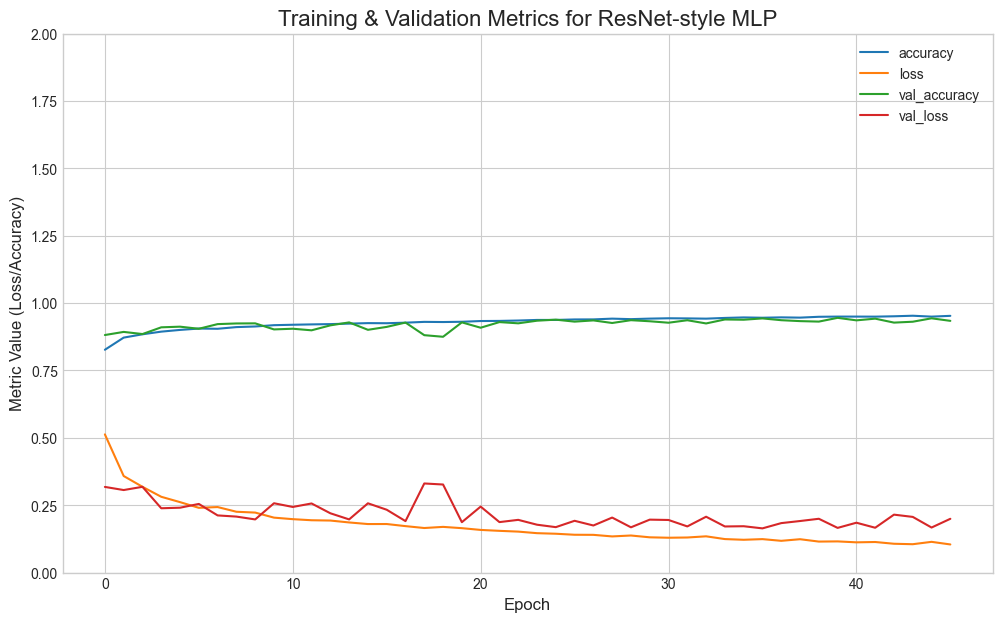

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_resnet.history).plot(figsize=(12, 7))

plt.grid(True)
plt.title("Training & Validation Metrics for ResNet-style MLP", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Metric Value (Loss/Accuracy)", fontsize=12)

# Set a consistent y-axis limit for easy comparison across models
plt.gca().set_ylim(0, 2)

plt.show()


 Generating predictions
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

 Classification Report for Tuned ResNet Model
Number of test samples: 24596
              precision    recall  f1-score   support

        7zip       0.85      0.88      0.87      2734
       bzip2       0.96      0.94      0.95      8053
        flac       0.99      0.98      0.99      3394
        gzip       0.96      0.95      0.95      9997
      winrar       0.64      0.86      0.73       418

    accuracy                           0.94     24596
   macro avg       0.88      0.92      0.90     24596
weighted avg       0.95      0.94      0.94     24596


 Confusion Matrix for Tuned ResNet Model 


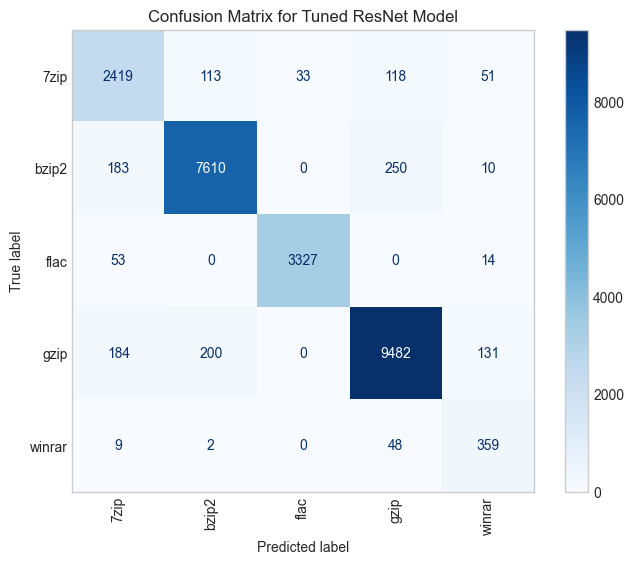


 ResNet Final Model Training History


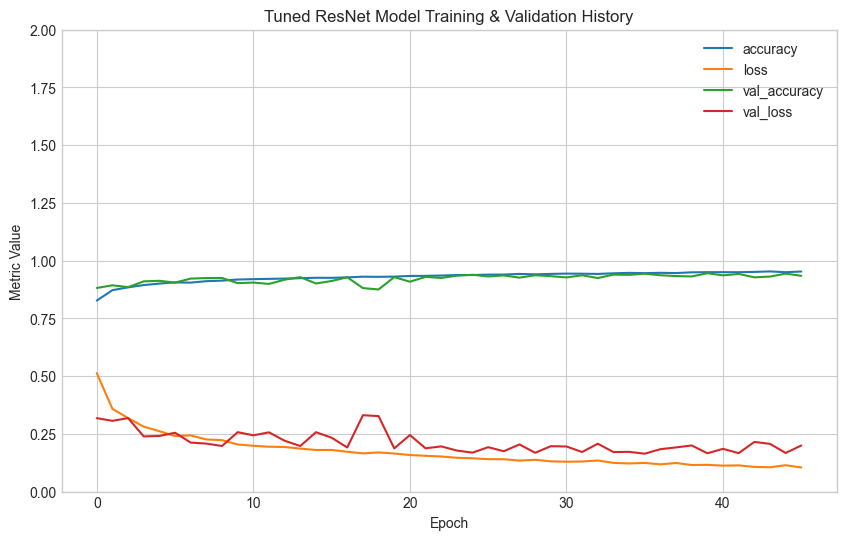


 AUC ROC Curves for Tuned ResNet Model

 Exact AUC Scores
AUC of class '7zip': 0.9880163373671265
AUC of class 'bzip2': 0.9954882901562977
AUC of class 'flac': 0.9998919671413349
AUC of class 'gzip': 0.9941303166345478
AUC of class 'winrar': 0.9908132506873859
Macro-average AUC: 0.9936786198759173


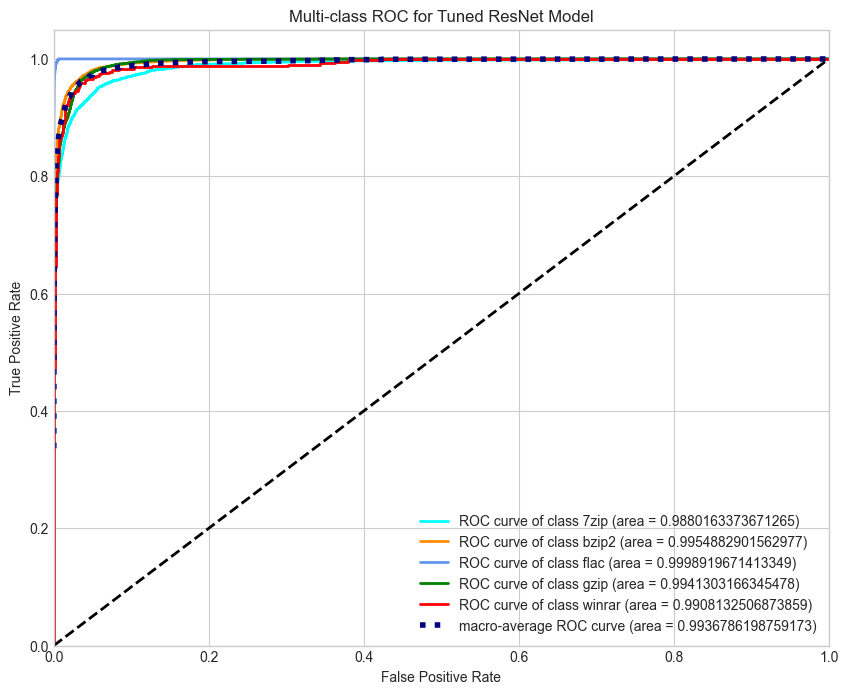


 Saving the final tuned ResNet model
Model successfully saved to 'tuned_resnet_model.h5'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Generate predictions
print("\n Generating predictions")
y_pred_prob_resnet = final_resnet_model.predict(X_test)
y_pred_resnet = np.argmax(y_pred_prob_resnet, axis=1)
class_names = label_encoder.classes_
n_classes = len(class_names)


# A. Evaluation Metrics Used: Classification Report
print("\n Classification Report for Tuned ResNet Model")
print(f"Number of test samples: {len(y_test)}")
print(classification_report(y_test, y_pred_resnet, target_names=class_names))


# B. Performance Comparison: Confusion Matrix Heatmap
print("\n Confusion Matrix for Tuned ResNet Model ")
cm_resnet = confusion_matrix(y_test, y_pred_resnet)
disp_resnet = ConfusionMatrixDisplay(confusion_matrix=cm_resnet, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_resnet.plot(ax=ax, xticks_rotation='vertical', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Tuned ResNet Model")
plt.grid(False)
plt.show()


# C. Visualizations: Training History
print("\n ResNet Final Model Training History")
pd.DataFrame(history_resnet.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title("Tuned ResNet Model Training & Validation History")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.show()


# D. Visualizations: AUC ROC Graph
print("\n AUC ROC Curves for Tuned ResNet Model")
y_test_binarized = label_binarize(y_test, classes=range(n_classes))
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob_resnet[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print("\n Exact AUC Scores")
for i in range(n_classes):
    print(f"AUC of class '{class_names[i]}': {roc_auc[i]}")
print(f"Macro-average AUC: {roc_auc['macro']}")

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]})')
plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (area = {roc_auc["macro"]})',
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Tuned ResNet Model')
plt.legend(loc="lower right")
plt.show()


# Save the final tuned ResNet model
print("\n Saving the final tuned ResNet model")
final_resnet_model.save('tuned_resnet_model.h5')
print("Model successfully saved to 'tuned_resnet_model.h5'")


#Model 5 DL-ML Hybrid (Deep Feature Extractor + XGBoost)

# ⚠️ Note on Interrupted Execution below

The cell below was **interrupted midway** (after running for approx. 2 hours) right after the **Feature Extractor** was fully trained. The interruption occurred due to the risk of losing the Colab runtime and compute limits.

At the point of interruption:

1. The **tuned deep feature extractor** model was fully trained on the training data.
2. **Deep features** for `X_train` and `X_test` were extracted.
3. `GridSearchCV` for XGBoost (81 fits total) **did not complete**.

> The code that did not complete execution has been **commented out** in this cell and will be **rerun in the following cells**.

Please **ignore the `KeyboardInterrupt` error**—it does not affect the completed steps .


Trial 90 Complete [00h 02m 53s]
val_accuracy: 0.8952022790908813

Best val_accuracy So Far: 0.9346411824226379
Total elapsed time: 02h 00m 55s

Optimal Hyperparameters Found:
- Num Layers: 1
- Learning Rate: 0.001

 Re-training the best Feature Extractor model on the full training data 
Epoch 1/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7846 - loss: 0.5973 - val_accuracy: 0.8171 - val_loss: 0.4552
Epoch 2/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8669 - loss: 0.3759 - val_accuracy: 0.8823 - val_loss: 0.3251
Epoch 3/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8852 - loss: 0.3157 - val_accuracy: 0.9036 - val_loss: 0.2552
Epoch 4/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8918 - loss: 0.2928 - val_accuracy: 0.8980 - val_loss: 0.2731
Epoch 5/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8927 - loss: 0.2941 - val_accuracy: 0.9004 - val_loss: 0.2750
Epoch 6/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0

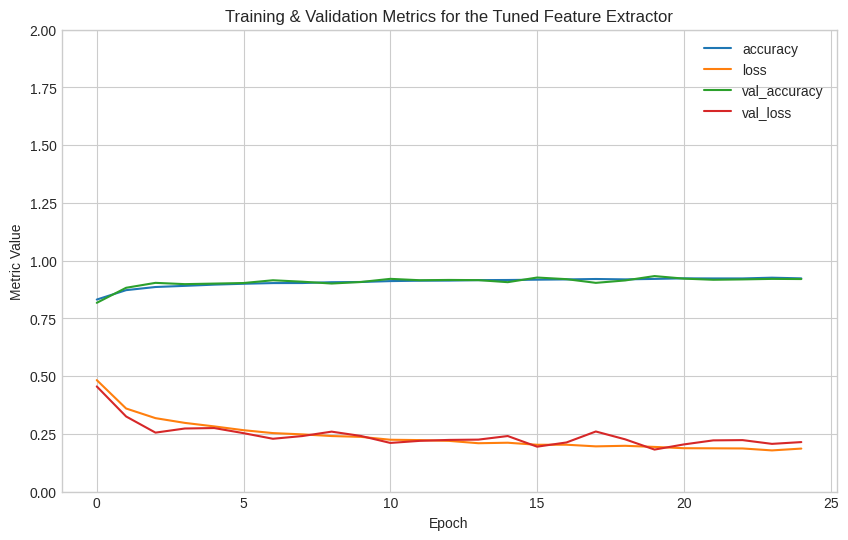


[Stage 2] Extracting deep features and tuning XGBoost
3075/3075 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

 Starting GridSearchCV for XGBoost Classifier
Fitting 3 folds for each of 27 candidates, totalling 81 fits


KeyboardInterrupt: 

In [ ]:
# MODEL 5: DL-ML HYBRID (WITH HYPERPARAMETER TUNING)
import tensorflow as tf
import keras_tuner as kt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle

# Stage 1: Tune the Deep Feature Extractor using KerasTuner
print("\n[Stage 1] Tuning the Deep Feature Extractor (Robust MLP)")

# Define the model-building function for the tuner
def build_feature_extractor(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    # Tune the number of hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tune the number of units in each layer
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=64, max_value=256, step=64),
            activation='relu'
        ))
        model.add(tf.keras.layers.BatchNormalization())
        # Tune the dropout rate
        model.add(tf.keras.layers.Dropout(hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)))

    # Final feature layer
    model.add(tf.keras.layers.Dense(64, activation='relu', name='feature_layer'))
    # Final classification layer
    model.add(tf.keras.layers.Dense(len(class_weight_dict), activation='softmax'))

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the tuner. We use Hyperband for efficient searching.
tuner = kt.Hyperband(
    build_feature_extractor,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='keras_tuner_dir',
    project_name='feature_extractor_tuning'
)

# Early stopping callback for the tuning process
early_stopping_tuner = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Start the hyperparameter search
print("\n Starting Hyperparameter Search for Feature Extractor")
tuner.search(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping_tuner]
)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"\nOptimal Hyperparameters Found:\n- Num Layers: {best_hps.get('num_layers')}\n- Learning Rate: {best_hps.get('learning_rate')}")

# Re-train the best model on the full training data
print("\n Re-training the best Feature Extractor model on the full training data ")
best_feature_extractor_model = tuner.hypermodel.build(best_hps)
history_extractor = best_feature_extractor_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=256,
    validation_data=(X_test, y_test), # Evaluate on the final test set
    class_weight=class_weight_dict,
    callbacks=[early_stopping_tuner],
    verbose=1
)

# C. Visualizations and Graphs (Tuned Extractor Part)
print("\n Training History of the Tuned Deep Feature Extractor")
pd.DataFrame(history_extractor.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title("Training & Validation Metrics for the Tuned Feature Extractor")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.show()

# Stage 2: Extract Features and Tune XGBoost Classifier
print("\n[Stage 2] Extracting deep features and tuning XGBoost")

# Create the final feature extractor from the best model
feature_layer_model = tf.keras.Model(
    inputs=best_feature_extractor_model.inputs,
    outputs=best_feature_extractor_model.get_layer('feature_layer').output
)

# Transform the datasets
X_train_deep = feature_layer_model.predict(X_train)
X_test_deep = feature_layer_model.predict(X_test)

# Tune XGBoost using GridSearchCV
'''print("\n Starting GridSearchCV for XGBoost Classifier")
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.2]
}

xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(class_weight_dict),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring='f1_macro', # Optimize for F1-score due to imbalance
    n_jobs=-1, # Use all available CPU cores
    cv=3,      # 3-fold cross-validation
    verbose=2
)

grid_search.fit(X_train_deep, y_train)

print(f"\nBest XGBoost parameters found: {grid_search.best_params_}")
best_xgb_classifier = grid_search.best_estimator_

grid_search.fit(X_train_deep, y_train)

print(f"\nBest XGBoost parameters found: {grid_search.best_params_}")
best_xgb_classifier = grid_search.best_estimator_'''


In [ ]:
# --- SAVE FINAL TUNED ARTIFACTS ---
print("--- Saving the final, tuned models and transformed data ---")

import tensorflow as tf
import joblib
import numpy as np

# --- 1. Save the Tuned Deep Feature Extractor Model ---
# This saves the complete model (architecture, weights, and optimizer state).
# The '.h5' format is a standard for saving Keras models.
try:
    best_feature_extractor_model.save('tuned_feature_extractor.h5')
    print("✅ Successfully saved tuned deep feature extractor to 'tuned_feature_extractor.h5'")
except Exception as e:
    print(f"❌ Error saving feature extractor model: {e}")


# --- 3. (Optional but Recommended) Save the Transformed Datasets ---
# This saves the output of your feature extractor, which can be useful for quick re-analysis
# without needing to run the deep model's predict() function again.
try:
    np.save('X_train_deep.npy', X_train_deep)
    np.save('X_test_deep.npy', X_test_deep)
    print("✅ Successfully saved transformed deep feature datasets to .npy files.")
except Exception as e:
    print(f"❌ Error saving deep feature datasets: {e}")

print("\n--- Artifacts Saved ---")
print("You can now download these files from the Colab file explorer on the left.")

--- Saving the final, tuned models and transformed data ---
✅ Successfully saved tuned deep feature extractor to 'tuned_feature_extractor.h5'
✅ Successfully saved transformed deep feature datasets to .npy files.

--- Artifacts Saved ---
You can now download these files from the Colab file explorer on the left.


# **Note:** This is a rerun of GridSearchCV.  
Please refer to the text cell **above the errored code cell** for explanation of the interruption.


In [ ]:
import tensorflow as tf
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle



# --- FINAL XGBOOST TUNING AND EVALUATION ---
print("--- Starting Final XGBoost Tuning ---")

import tensorflow as tf
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

# --- 1. Load the Pre-Trained Deep Feature Extractor ---
# We assume the setup cell has been run to create X_train, y_train, X_test, y_test.
# Now, we load the best feature extractor model you saved.
print("Loading the tuned deep feature extractor model from 'tuned_feature_extractor.h5'...")
# Make sure you have uploaded the .h5 file to your Colab session.
try:
    feature_extractor_model = tf.keras.models.load_model('tuned_feature_extractor.h5')

    # Recreate the model without the final classification layer
    feature_layer_model = tf.keras.Model(
        inputs=feature_extractor_model.inputs,
        outputs=feature_extractor_model.layers[-2].output # Get the second to last layer
    )
    print("✅ Successfully loaded and reconfigured the feature extractor.")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Please ensure 'tuned_feature_extractor.h5' is uploaded to your Colab session.")
    # Stop execution if the model can't be loaded
    raise

# --- 2. Extract Deep Features ---
# It is CRITICAL to re-generate the deep features from the correct, consistent data splits.
print("\nTransforming the consistent data splits into deep features...")
X_train_deep = feature_layer_model.predict(X_train)
X_test_deep = feature_layer_model.predict(X_test)

print(f"Data consistency check:")
print(f"  - Shape of X_train_deep: {X_train_deep.shape}")
print(f"  - Shape of y_train:      {y_train.shape}")
print(f"  - Shape of X_test_deep:  {X_test_deep.shape}")
print(f"  - Shape of y_test:       {y_test.shape}")


# --- 3. Tune XGBoost using GridSearchCV ---

print("\n Starting GridSearchCV for XGBoost Classifier")
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.2]
}

xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(class_weight_dict),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring='f1_macro', # Optimize for F1-score due to imbalance
    n_jobs=-1, # Use all available CPU cores
    cv=3,      # 3-fold cross-validation
    verbose=1
)

grid_search.fit(X_train_deep, y_train)

print(f"\nBest XGBoost parameters found: {grid_search.best_params_}")
best_xgb_classifier = grid_search.best_estimator_

--- Starting Final XGBoost Tuning ---
Loading the tuned deep feature extractor model from 'tuned_feature_extractor.h5'...


✅ Successfully loaded and reconfigured the feature extractor.

Transforming the consistent data splits into deep features...
3075/3075 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Data consistency check:
  - Shape of X_train_deep: (98380, 64)
  - Shape of y_train:      (98380,)
  - Shape of X_test_deep:  (24596, 64)
  - Shape of y_test:       (24596,)

 Starting GridSearchCV for XGBoost Classifier
Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:07:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best XGBoost parameters found: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}


In [ ]:
# SAVE THE FINAL TUNED XGBOOST CLASSIFIER

# Define the filename for your saved model
xgb_model_filename = 'tuned_xgb_classifier.pkl'

print(f"--- Saving the best XGBoost model to '{xgb_model_filename}' ---")

try:
    # Use joblib.dump to save the model object to a file
    joblib.dump(best_xgb_classifier, xgb_model_filename)
    print(f"Model successfully saved.")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

--- Saving the best XGBoost model to 'tuned_xgb_classifier.pkl' ---
Model successfully saved.


In [ ]:
!pip install tensorflow xgboost scikit-learn matplotlib pandas numpy
import tensorflow as tf
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle

xgb_model_filename = 'tuned_xgb_classifier.pkl'

print(f"--- Loading the XGBoost model from '{xgb_model_filename}' ---")

# Make sure you have uploaded the .pkl file to your session
try:
    # Use joblib.load to load the model back into a variable
    best_xgb_classifier= joblib.load(xgb_model_filename)

    print("✅ Model successfully loaded.")

    # You can now use it to make predictions
    # Example: y_predictions = loaded_xgb_model.predict(X_test_deep)

except Exception as e:
    print(f"❌ An error occurred while loading the model: {e}")

print("Loading the tuned deep feature extractor model from 'tuned_feature_extractor.h5'...")
# Make sure you have uploaded the .h5 file to your Colab session.
try:
    feature_extractor_model = tf.keras.models.load_model('tuned_feature_extractor.h5')

    # Recreate the model without the final classification layer
    feature_layer_model = tf.keras.Model(
        inputs=feature_extractor_model.inputs,
        outputs=feature_extractor_model.layers[-2].output # Get the second to last layer
    )
    print("✅ Successfully loaded and reconfigured the feature extractor.")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Please ensure 'tuned_feature_extractor.h5' is uploaded to your Colab session.")
    # Stop execution if the model can't be loaded
    raise

# --- 2. Extract Deep Features ---
# It is CRITICAL to re-generate the deep features from the correct, consistent data splits.
print("\nTransforming the consistent data splits into deep features...")
X_train_deep = feature_layer_model.predict(X_train)
X_test_deep = feature_layer_model.predict(X_test)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00


--- Loading the XGBoost model from 'tuned_xgb_classifier.pkl' ---
✅ Model successfully loaded.
Loading the tuned deep feature extractor model from 'tuned_feature_extractor.h5'...
✅ Successfully loaded and reconfigured the feature extractor.

Transforming the consistent data splits into deep features...
3075/3075 ━━━━━━━━━━━━━━━━━━━━ 2s 752us/step
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step


In [ ]:
overlap = np.intersect1d(X_train_deep.view([('', X_train_deep.dtype)]*X_train_deep.shape[1]),
                         X_test_deep.view([('', X_test_deep.dtype)]*X_test_deep.shape[1]))
print("Number of overlapping rows:", len(overlap))

Number of overlapping rows: 1218


In [ ]:
# Assuming X_train_deep and X_test_deep are numpy arrays
train_rows = pd.DataFrame(X_train_deep)
test_rows = pd.DataFrame(X_test_deep)

# Keep only test rows not in training
mask = ~test_rows.apply(tuple, 1).isin(train_rows.apply(tuple, 1))
X_test_deep = X_test_deep[mask.values]
y_test= y_test[mask.values]

print("Clean test set size:", X_test_deep.shape)


Clean test set size: (23229, 64)


In [ ]:
# Performance Evaluation of the Final Tuned Hybrid Model
print("\n Evaluating Final Tuned DL-ML Hybrid Model on Test Data ")
y_pred_xgb = best_xgb_classifier.predict(X_test_deep)
y_prob_xgb = best_xgb_classifier.predict_proba(X_test_deep)
class_names = label_encoder.classes_
n_classes = len(class_names)

# A. Evaluation Metrics Used: Classification Report
print("\n Classification Report for Tuned DL-ML Hybrid Model ")
print(f"Number of test samples: {len(y_test)}")
print(classification_report(y_test, y_pred_xgb, target_names=class_names))


 Evaluating Final Tuned DL-ML Hybrid Model on Test Data 

 Classification Report for Tuned DL-ML Hybrid Model 
Number of test samples: 23229
              precision    recall  f1-score   support

        7zip       0.92      0.85      0.89      2461
       bzip2       0.96      0.96      0.96      7560
        flac       0.99      0.99      0.99      3394
        gzip       0.95      0.97      0.96      9417
      winrar       0.85      0.79      0.82       397

    accuracy                           0.95     23229
   macro avg       0.93      0.91      0.92     23229
weighted avg       0.95      0.95      0.95     23229




Confusion Matrix for Tuned DL-ML Hybrid Model


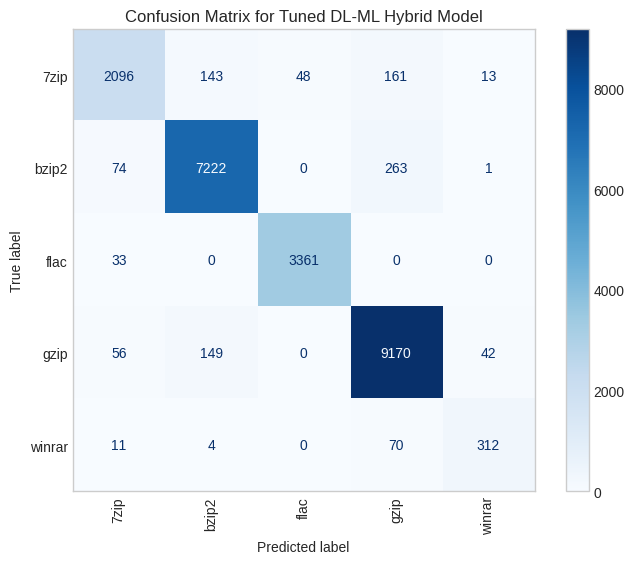

In [ ]:
# B. Performance Comparison: Confusion Matrix Heatmap
print("\nConfusion Matrix for Tuned DL-ML Hybrid Model")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_xgb.plot(ax=ax, xticks_rotation='vertical', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Tuned DL-ML Hybrid Model")
plt.grid(False)
plt.show()


--- AUC ROC Curves for Tuned DL-ML Hybrid Model (One-vs-Rest) ---


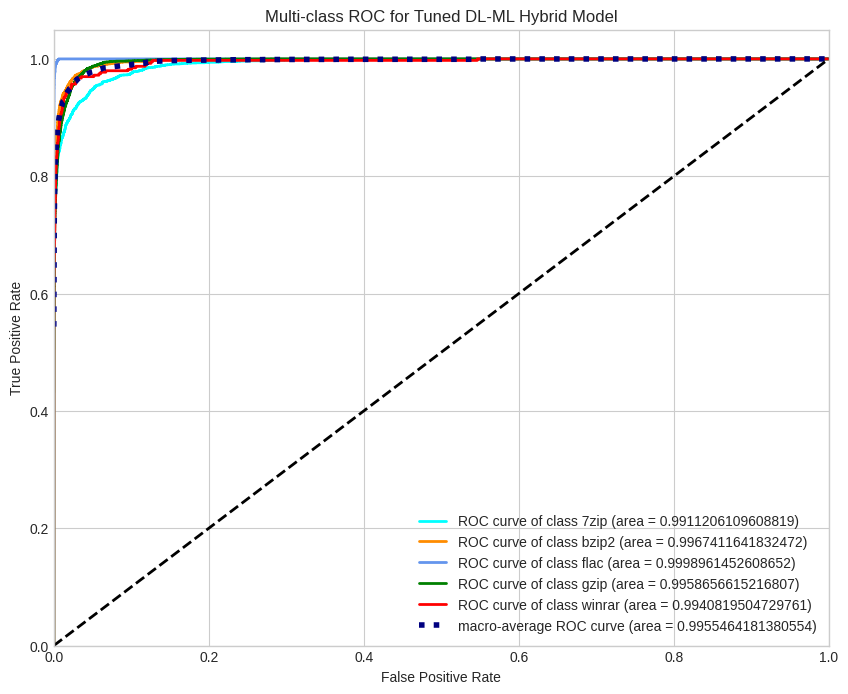

In [ ]:
# C. Visualizations: AUC ROC Graph with Exact Scores
print("\n--- AUC ROC Curves for Tuned DL-ML Hybrid Model (One-vs-Rest) ---")

# (This first part of the code remains the same)
# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# --- UPDATED PLOTTING SECTION ---

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

# Loop through each class to plot its ROC curve with the exact AUC score
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             # CHANGED: Removed the ":0.2f" formatting to show the full score
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]})')

# Plot the macro-average ROC curve with the exact score
plt.plot(fpr["macro"], tpr["macro"],
         # CHANGED: Removed the ":0.2f" formatting here as well
         label=f'macro-average ROC curve (area = {roc_auc["macro"]})',
         color='navy', linestyle=':', linewidth=4)

# (The rest of the plotting code is unchanged)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Tuned DL-ML Hybrid Model')
plt.legend(loc="lower right")
plt.show()

# NOTE: Seperate .py files and .css files were used for Streamlit App Building